In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path='hotel_revenue.xlsx'
dataframes=pd.read_excel(file_path,sheet_name=None)
print(dataframes)

{'2018':               hotel  is_canceled  lead_time  arrival_date_year  \
0      Resort Hotel            1         85               2018   
1      Resort Hotel            1         75               2018   
2      Resort Hotel            1         23               2018   
3      Resort Hotel            1         60               2018   
4      Resort Hotel            1         96               2018   
...             ...          ...        ...                ...   
21991    City Hotel            1         24               2018   
21992    City Hotel            1          1               2018   
21993    City Hotel            1         66               2018   
21994    City Hotel            1         54               2018   
21995    City Hotel            1         54               2018   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0                   July                        27                          1   
1                   July            

# 2018 Hotel Analysis Insights into Booking Cancellations and Patterns

In [3]:
df=dataframes['2018']

In [4]:
import os
os.listdir()

['.ipynb_checkpoints', 'hotel_revenue.xlsx', 'Untitled.ipynb']

In [5]:

for i in df.describe(include='object').columns:
    print(i)
    print(df[i].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December']
meal
['BB' 'HB' 'FB' 'Undefined' 'SC']
country
['PRT' 'IRL' 'ESP' 'DEU' 'CN' 'ITA' nan 'GBR' 'BEL' 'RUS' 'FRA' 'MOZ'
 'IRN' 'BRA' 'KOR' 'AGO' 'USA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'CHE' 'GRC'
 'NLD' 'DNK' 'SWE' 'AUS' 'EST' 'CZE' 'FIN' 'BWA' 'LUX' 'SVN' 'ALB' 'IND'
 'CHN' 'MEX' 'MAR' 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU'
 'TUR' 'ZAF' 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'CRI' 'NZL' 'HUN' 'IDN'
 'HRV' 'KAZ' 'THA' 'COL' 'DOM' 'MKD' 'MYS' 'NGA' 'VEN' 'GIB' 'ARM' 'JPN'
 'LKA' 'TUN' 'STP' 'BGR' 'TWN' 'AZE' 'LBN' 'SVK' 'CMR' 'SGP' 'SEN' 'PER'
 'EGY' 'SAU' 'KNA' 'JOR' 'KWT' 'ETH' 'PHL' 'LIE' 'MMR' 'IRQ' 'PAN' 'GEO'
 'TMP' 'MUS' 'ECU']
market_segment
['Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Groups' 'Complementary'
 'Undefined']
distribution_channel
['TA/TO' 'Direct' 'Corporate' 'Undefined' 'GDS']
reserved_room_type
['A' 'D' 'E' 'G' 'F' 'H' 'C' 'L' 'B']
assi

In [6]:
cancellation_counts=df['is_canceled'].value_counts()
not_canceled=cancellation_counts[0]
canceled=cancellation_counts[1]
diff=not_canceled-canceled
print("Total canceled bookings:",canceled)
print("Total non canceled bookings:",not_canceled)
print("Difference between canceled and non canceled bookings:",diff)

Total canceled bookings: 8142
Total non canceled bookings: 13854
Difference between canceled and non canceled bookings: 5712


Total number of canceled  bookings were 8142,non canceled bookings were 13854 and 2712 bookings were non canceled bookings more than canceled

In [7]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.00,0,1,Canceled,2018-05-06
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.50,0,0,Canceled,2018-04-22
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.00,0,0,Canceled,2018-06-23
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.00,0,2,Canceled,2018-05-11
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.30,0,2,Canceled,2018-05-29
5,Resort Hotel,1,45,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,2018-05-19
6,Resort Hotel,1,40,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,1,Canceled,2018-06-19
7,Resort Hotel,1,43,2018,July,27,2,1,3,3,...,No Deposit,241.0,NaN,0,Transient,108.80,0,0,Canceled,2018-05-23
8,Resort Hotel,1,45,2018,July,27,2,2,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,0,0,Canceled,2018-05-18
9,Resort Hotel,1,47,2018,July,27,2,2,5,2,...,No Deposit,240.0,NaN,0,Transient,153.00,0,0,Canceled,2018-06-02


In [8]:
df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             133
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              3099
company                           20691


In [9]:
df['country' ]=df['country' ].fillna("not defined")

In [10]:
df['children' ]=df['children' ].fillna(0)

In [11]:
df= df.drop(columns = ['agent','company'])

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [13]:
cancellation_rate = df.groupby('previous_cancellations')['is_canceled'].mean()
print("Cancellation Rate based on Previous Cancellations:",cancellation_rate)

Cancellation Rate based on Previous Cancellations: previous_cancellations
0     0.213712
1     0.992490
2     0.548387
3     1.000000
11    1.000000
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: is_canceled, dtype: float64


previous cancellation rate shows that bookings with no prior cancellations have a relatively low cancellation rate of 21.4%. However, if a booking has one prior cancellation, the cancellation rate jumps dramatically to 99.2%. For bookings with two or more previous cancellations, the cancellation rate is consistently at 100%. This indicates that the more previous cancellations a booking has, the higher the likelihood of it being canceled again.

In [14]:
special_requests_cancellation_rate = df.groupby('total_of_special_requests')['is_canceled'].mean()
print("Cancellation Rate based on Total of Special Requests:",special_requests_cancellation_rate)

Cancellation Rate based on Total of Special Requests: total_of_special_requests
0    0.440933
1    0.196120
2    0.236444
3    0.195822
4    0.090909
5    0.000000
Name: is_canceled, dtype: float64


Cancellation rates decrease with the number of special requests. Bookings with 0 special requests have a 44.1% cancellation rate, while those with 5 special requests have no cancellations at all. This suggests that more special requests are associated with a lower likelihood of cancellation.

In [15]:
df['room_type_mismatch'] = df['reserved_room_type'] != df['assigned_room_type']
room_type_mismatch_cancellation_rate = df.groupby('room_type_mismatch')['is_canceled'].mean()
print("Cancellation Rate based on Room Type Mismatch:",room_type_mismatch_cancellation_rate)


Cancellation Rate based on Room Type Mismatch: room_type_mismatch
False    0.441079
True     0.034411
Name: is_canceled, dtype: float64


Bookings with a mismatch in room types have a cancellation rate of just 3.4%, compared to 44.1% for those where the room types match. This indicates that mismatches in room type are associated with fewer cancellations

In [16]:
customer_type_cancellation_rate = df.groupby('customer_type')['is_canceled'].mean()
print("Cancellation Rate by Customer Type:",customer_type_cancellation_rate)

Cancellation Rate by Customer Type: customer_type
Contract           0.399172
Group              0.177083
Transient          0.364710
Transient-Party    0.373040
Name: is_canceled, dtype: float64


Contract customers have the highest cancellation rate at 39.9%. This is followed by Transient at 36.5%, Transient-Party at 37.3%, and Group with the lowest rate at 17.7%. This suggests that Group bookings are less likely to be canceled compared to other customer types.

In [17]:
adults_cancellation_rate = df.groupby('adults')['is_canceled'].mean()
print("Cancellation Rate based on Number of Adults:",adults_cancellation_rate)

Cancellation Rate based on Number of Adults: adults
0     0.136364
1     0.263017
2     0.403965
3     0.162996
4     0.250000
5     1.000000
6     1.000000
10    1.000000
20    1.000000
26    1.000000
27    1.000000
40    1.000000
50    1.000000
55    1.000000
Name: is_canceled, dtype: float64


In [18]:
children_cancellation_rate = df.groupby('children')['is_canceled'].mean()
print("Cancellation Rate based on Number of Children:",children_cancellation_rate)

Cancellation Rate based on Number of Children: children
0.0     0.376903
1.0     0.163180
2.0     0.269321
3.0     0.200000
10.0    1.000000
Name: is_canceled, dtype: float64


In [19]:
babies_cancellation_rate = df.groupby('babies')['is_canceled'].mean()
print("Cancellation Rate based on Number of Babies:",babies_cancellation_rate)

Cancellation Rate based on Number of Babies: babies
0    0.371896
1    0.195238
2    0.000000
9    0.000000
Name: is_canceled, dtype: float64


In [20]:
year_cancellation_rate = df.groupby(df['reservation_status_date'].dt.year)['is_canceled'].mean()
print("Cancellation Rate by Reservation Year:",year_cancellation_rate)

Cancellation Rate by Reservation Year: reservation_status_date
2014    1.00000
2018    0.37161
2019    0.00000
Name: is_canceled, dtype: float64


Highest cancellation rate done in 2014 that is 100%,in 2018 there is 37.1% and in 2019 there is no cancellation done.

In [21]:
canceled_in_resort=df[df['hotel']=='Resort Hotel']['is_canceled'].value_counts()
canceled_in_resort

is_canceled
0    6176
1    2138
Name: count, dtype: int64

In [22]:
canceled_in_resort=df[df['hotel']=='City Hotel']['is_canceled'].value_counts()
canceled_in_resort

is_canceled
0    7678
1    6004
Name: count, dtype: int64

In [23]:
cancelation_by_market=df.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
cancelation_by_market

market_segment
Undefined        1.000000
Groups           0.630000
Offline TA/TO    0.340023
Online TA        0.266829
Corporate        0.187020
Direct           0.151685
Complementary    0.090909
Name: is_canceled, dtype: float64

The "groups" shows a high cancellation rate of 63.0%. Other segments like "Offline TA/TO" and "Online TA" have moderate cancellation rates of 34.0% and 26.7%, respectively. The "Corporate" segment has a lower cancellation rate of 18.7%, and "Direct" bookings show a rate of 15.2%. The "Complementary" segment has the lowest cancellation rate at 9.1%. This indicates that cancellations are more prevalent in certain market segments, with "Groups" having significantly higher rates compared to others.

In [24]:
cancelation_by_deposit=df.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)
cancelation_by_deposit

deposit_type
Non Refund    0.997546
No Deposit    0.244693
Refundable    0.000000
Name: is_canceled, dtype: float64

These analysis shows that "No Deposit" bookings have a 24.5% cancellation rate, while "Non Refund" bookings are almost always canceled at 99.8%. "Refundable" bookings have a 0% cancellation rate. This shows that higher cancellation rates are associated with bookings that require no deposit or non-refundable deposits

In [25]:
df['total_stays']=df['stays_in_weekend_nights']+df['stays_in_week_nights']
stays_length_cancelation_rate=df.groupby('total_stays')['is_canceled'].mean().sort_values(ascending=False)
stays_length_cancelation_rate

total_stays
27    1.000000
23    1.000000
33    1.000000
20    1.000000
16    0.909091
2     0.510347
19    0.500000
18    0.500000
17    0.500000
21    0.400000
4     0.370728
3     0.342142
12    0.340426
28    0.333333
6     0.332432
5     0.316000
8     0.313869
7     0.287802
9     0.284884
14    0.275449
1     0.247611
13    0.215686
10    0.196429
11    0.180556
22    0.166667
15    0.153846
0     0.006494
30    0.000000
29    0.000000
46    0.000000
60    0.000000
Name: is_canceled, dtype: float64

Cancellation rates go up when people book longer stays. Specifically, cancellations are especially high for stays of 16, 20, 23, 27, and 33 nights. On the other hand, cancellations are lower for stays of 0, 29, 30, 46, and 60 nights.

In [136]:
df['arrival_day_of_week']=pd.to_datetime(df['arrival_date_year'].astype(str)+"-"+
                                        df['arrival_date_month'].astype(str)+"-"+
                                        df['arrival_date_day_of_month'].astype(str)).dt.day_name()
day_of_week_cancellation_rate = df.groupby('arrival_day_of_week')['is_canceled'].mean()

print("Cancellation Rate by Day of the Week:")
print(day_of_week_cancellation_rate)

Cancellation Rate by Day of the Week:
arrival_day_of_week
Friday       0.375514
Monday       0.417135
Saturday     0.308601
Sunday       0.312762
Thursday     0.257440
Tuesday      0.375064
Wednesday    0.462972
Name: is_canceled, dtype: float64


Wednesdays have the highest cancellation rate at about 46%. Mondays and Fridays also see a lot of cancellations. On the other hand, Thursdays have the lowest cancellation rate at around 26%. This means cancellations are more common at the beginning of the week and drop as the week goes on.

In [27]:
day_of_week_cancelation=df.groupby('arrival_day_of_week')['is_canceled'].mean().sort_values(ascending=False)
day_of_week_cancelation

arrival_day_of_week
Wednesday    0.462972
Monday       0.417135
Friday       0.375514
Tuesday      0.375064
Sunday       0.312762
Saturday     0.308601
Thursday     0.257440
Name: is_canceled, dtype: float64

In [28]:
distribution_channel_cancellation_rate = df.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate by Distribution Channel:")
print(distribution_channel_cancellation_rate)

Cancellation Rate by Distribution Channel:
distribution_channel
Undefined    0.800000
TA/TO        0.409503
Corporate    0.255464
Direct       0.179174
GDS          0.000000
Name: is_canceled, dtype: float64


Bookings made through "Undefined" sources have the highest cancellation rates, whereas bookings from "GDS" sources have the lowest cancellation rates

In [29]:
cancelation_by_country=df.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
cancelation_by_country

country
PRT            0.569775
not defined    0.240602
ITA            0.228519
MOZ            0.166667
IRL            0.136082
                 ...   
BGR            0.000000
IND            0.000000
IDN            0.000000
HUN            0.000000
KNA            0.000000
Name: is_canceled, Length: 99, dtype: float64

Portugal has the highest cancellation rate at about 56.9% among the top countries. After Portugal, the cancellation rates drop for Undefined locations, Italy, Mozambique, and Ireland. Portugal has the biggest problem with cancellations compared to the other countries.

In [30]:
correlation_matrix = df.corr(numeric_only=True)
print("Correlation with Cancellation:")
print(correlation_matrix['is_canceled'].sort_values(ascending=False))

Correlation with Cancellation:
is_canceled                       1.000000
lead_time                         0.459205
previous_cancellations            0.237623
adults                            0.069984
is_repeated_guest                 0.064222
arrival_date_day_of_month        -0.017219
stays_in_weekend_nights          -0.018796
babies                           -0.033679
adr                              -0.046861
total_stays                      -0.048853
days_in_waiting_list             -0.050202
children                         -0.053407
previous_bookings_not_canceled   -0.053959
stays_in_week_nights             -0.055907
arrival_date_week_number         -0.116572
booking_changes                  -0.183145
total_of_special_requests        -0.192030
required_car_parking_spaces      -0.195571
room_type_mismatch               -0.319584
arrival_date_year                      NaN
Name: is_canceled, dtype: float64


In [31]:
country_mapping = {
    'PRT': 'Portugal',
    'IRL': 'Ireland',
    'ESP': 'Spain',
    'DEU': 'Germany',
    'CN': 'China',
    'ITA': 'Italy',
    'GBR': 'United Kingdom',
    'BEL': 'Belgium',
    'RUS': 'Russia',
    'FRA': 'France',
    'MOZ': 'Mozambique',
    'IRN': 'Iran',
    'BRA': 'Brazil',
    'KOR': 'South Korea',
    'AGO': 'Angola',
    'USA': 'United States',
    'ROU': 'Romania',
    'NOR': 'Norway',
    'OMN': 'Oman',
    'ARG': 'Argentina',
    'POL': 'Poland',
    'CHE': 'Switzerland',
    'GRC': 'Greece',
    'NLD': 'Netherlands',
    'DNK': 'Denmark',
    'SWE': 'Sweden',
    'AUS': 'Australia',
    'EST': 'Estonia',
    'CZE': 'Czech Republic',
    'FIN': 'Finland',
    'BWA': 'Botswana',
    'LUX': 'Luxembourg',
    'SVN': 'Slovenia',
    'ALB': 'Albania',
    'IND': 'India',
    'CHN': 'China',
    'MEX': 'Mexico',
    'MAR': 'Morocco',
    'UKR': 'Ukraine',
    'SMR': 'San Marino',
    'LVA': 'Latvia',
    'PRI': 'Puerto Rico',
    'SRB': 'Serbia',
    'CHL': 'Chile',
    'AUT': 'Austria',
    'BLR': 'Belarus',
    'LTU': 'Lithuania',
    'TUR': 'Turkey',
    'ZAF': 'South Africa',
    'ISR': 'Israel',
    'CYM': 'Cayman Islands',
    'ZMB': 'Zambia',
    'CPV': 'Cape Verde',
    'ZWE': 'Zimbabwe',
    'DZA': 'Algeria',
    'CRI': 'Costa Rica',
    'NZL': 'New Zealand',
    'HUN': 'Hungary',
    'IDN': 'Indonesia',
    'HRV': 'Croatia',
    'KAZ': 'Kazakhstan',
    'THA': 'Thailand',
    'COL': 'Colombia',
    'DOM': 'Dominican Republic',
    'MKD': 'North Macedonia',
    'MYS': 'Malaysia',
    'NGA': 'Nigeria',
    'VEN': 'Venezuela',
    'GIB': 'Gibraltar',
    'ARM': 'Armenia',
    'JPN': 'Japan',
    'LKA': 'Sri Lanka',
    'TUN': 'Tunisia',
    'STP': 'Sao Tome and Principe',
    'BGR': 'Bulgaria',
    'TWN': 'Taiwan',
    'AZE': 'Azerbaijan',
    'LBN': 'Lebanon',
    'SVK': 'Slovakia',
    'CMR': 'Cameroon',
    'SGP': 'Singapore',
    'SEN': 'Senegal',
    'PER': 'Peru',
    'EGY': 'Egypt',
    'SAU': 'Saudi Arabia',
    'KNA': 'Saint Kitts and Nevis',
    'JOR': 'Jordan',
    'KWT': 'Kuwait',
    'ETH': 'Ethiopia',
    'PHL': 'Philippines',
    'LIE': 'Liechtenstein',
    'MMR': 'Myanmar',
    'IRQ': 'Iraq',
    'PAN': 'Panama',
    'GEO': 'Georgia',
    'TMP': 'East Timor',
    'MUS': 'Mauritius',
    'ECU': 'Ecuador'
}


In [32]:
df['country'] = df['country'].map(country_mapping)

is_canceled
0    0.629842
1    0.370158
Name: proportion, dtype: float64


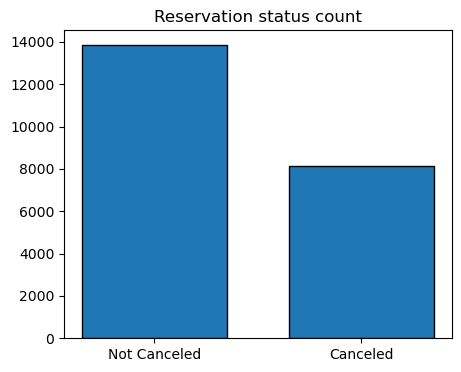

In [33]:
cancelled_perc = df["is_canceled"].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))

plt.title("Reservation status count")

plt.bar(["Not Canceled","Canceled"],df["is_canceled"].value_counts(),edgecolor="k",width = 0.7)
plt.show()

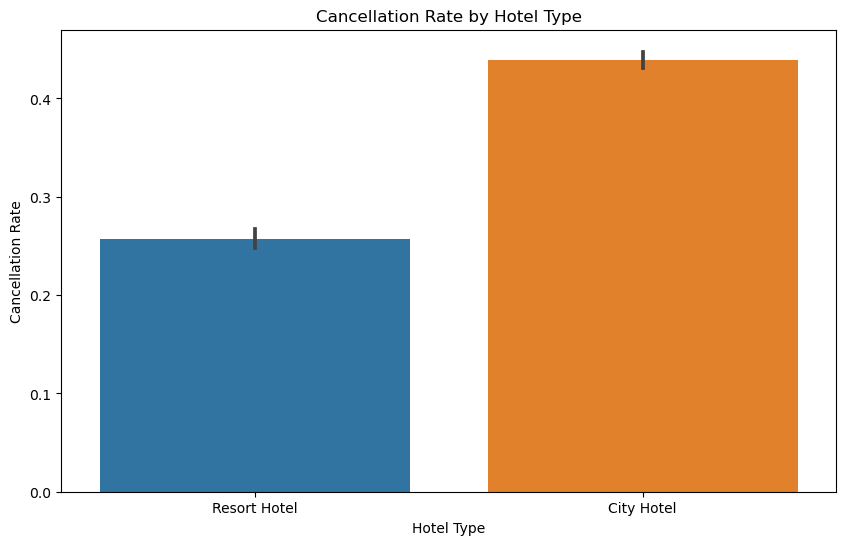

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='is_canceled', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

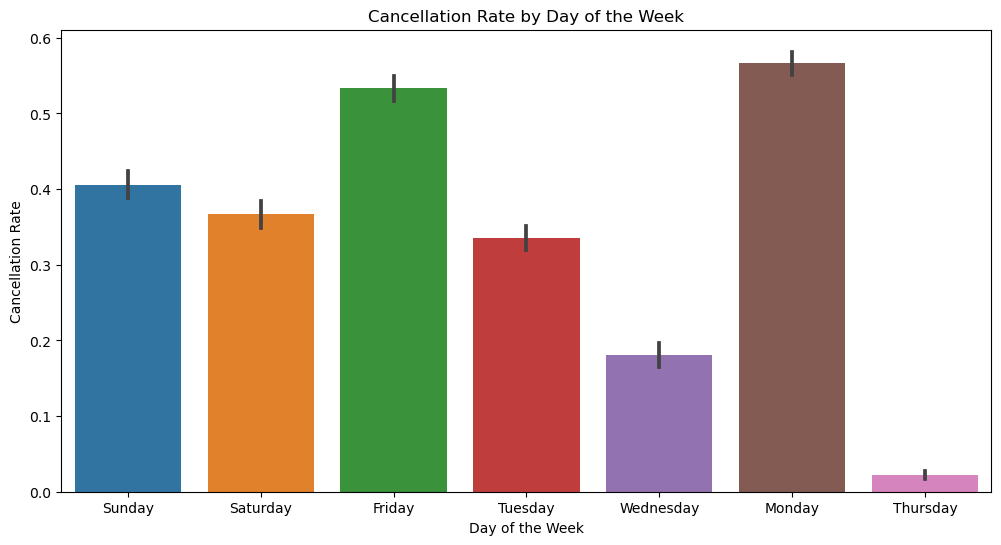

In [35]:
df['day_of_week'] = df['reservation_status_date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='is_canceled', data=df, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate')
plt.show()

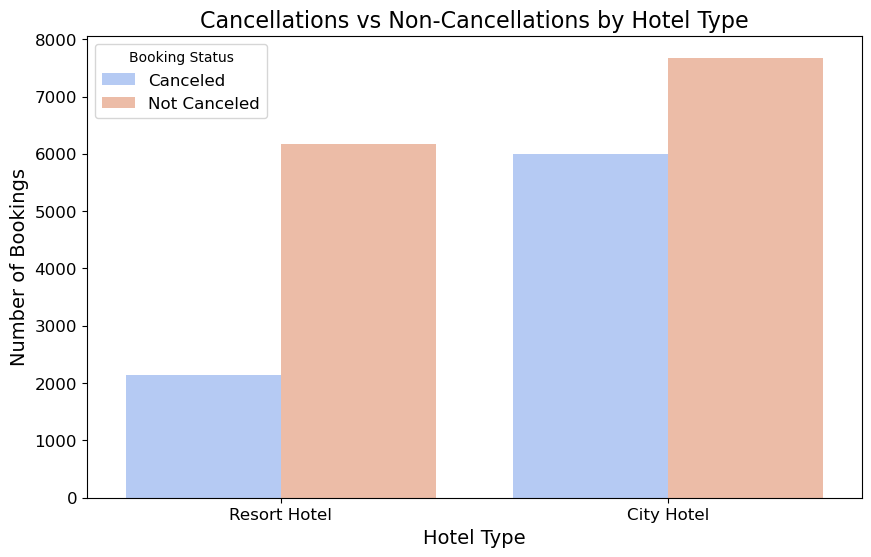

In [36]:

df['Cancellation_Status'] = df['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='Cancellation_Status', palette='coolwarm')

plt.title('Cancellations vs Non-Cancellations by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(title='Booking Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

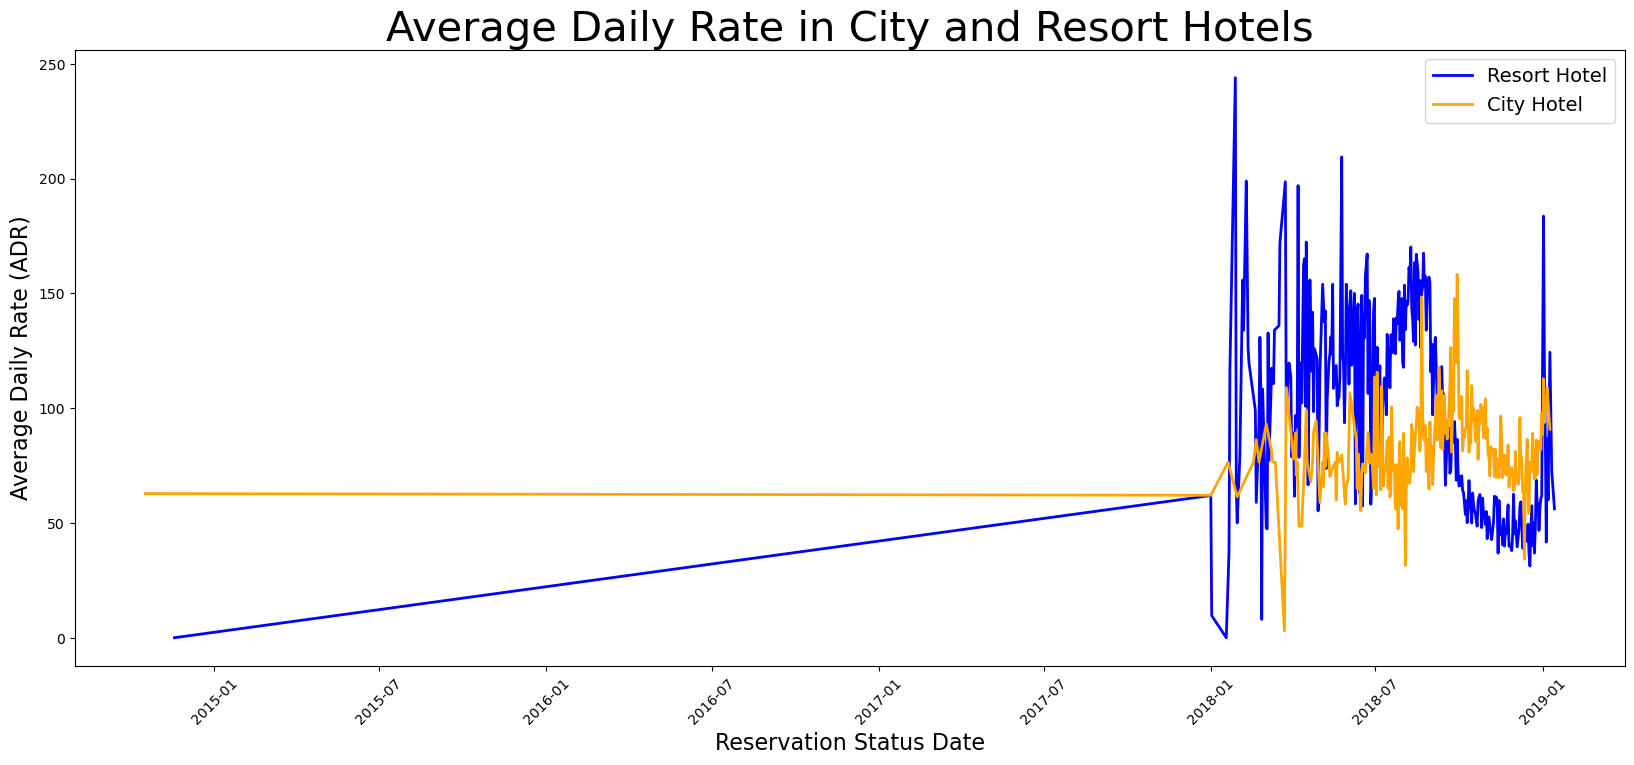

In [37]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
city_hotel = df[df['hotel'] == 'City Hotel']

resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel_cancellation = city_hotel['is_canceled'].value_counts(normalize=True)

resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate in City and Resort Hotels", fontsize=30)

plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel', color='blue', linewidth=2)

plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel', color='orange', linewidth=2)

plt.xlabel('Reservation Status Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=14)

plt.show()


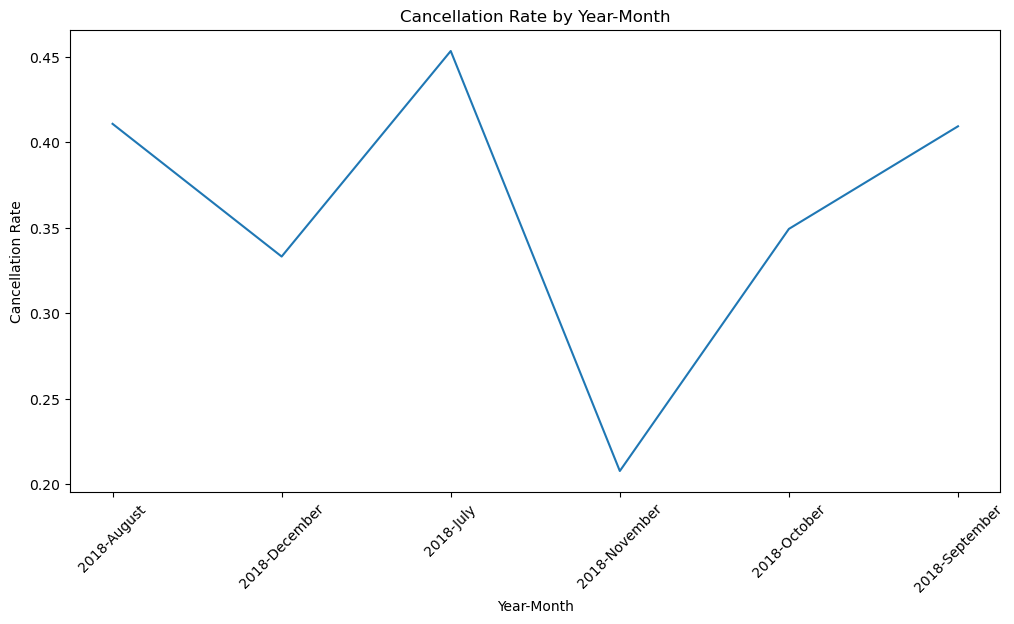

In [38]:
df['year_month'] = df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']

year_month_cancellation_rate = df.groupby('year_month')['is_canceled'].mean()

# Plotting the trend
plt.figure(figsize=(12, 6))
year_month_cancellation_rate.plot()
plt.title('Cancellation Rate by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()

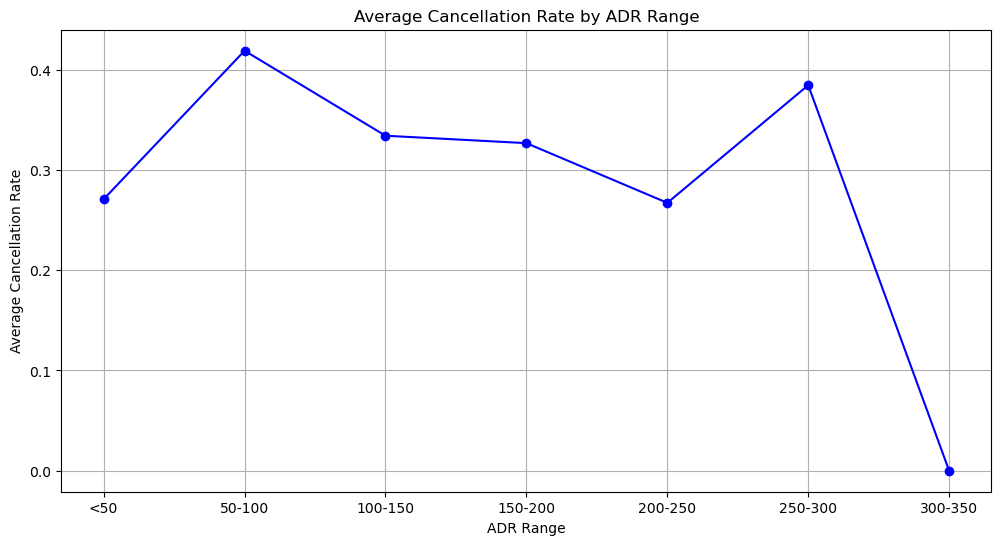

In [39]:
adr_bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
adr_labels = ['<50', '50-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450+']

df['adr_bin'] = pd.cut(df['adr'], bins=adr_bins, labels=adr_labels, right=False)

cancellation_rates = df.groupby('adr_bin')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
plt.plot(cancellation_rates.index, cancellation_rates.values, marker='o', linestyle='-', color='b')

plt.xlabel('ADR Range')
plt.ylabel('Average Cancellation Rate')
plt.title('Average Cancellation Rate by ADR Range')
plt.grid(True)

plt.show()

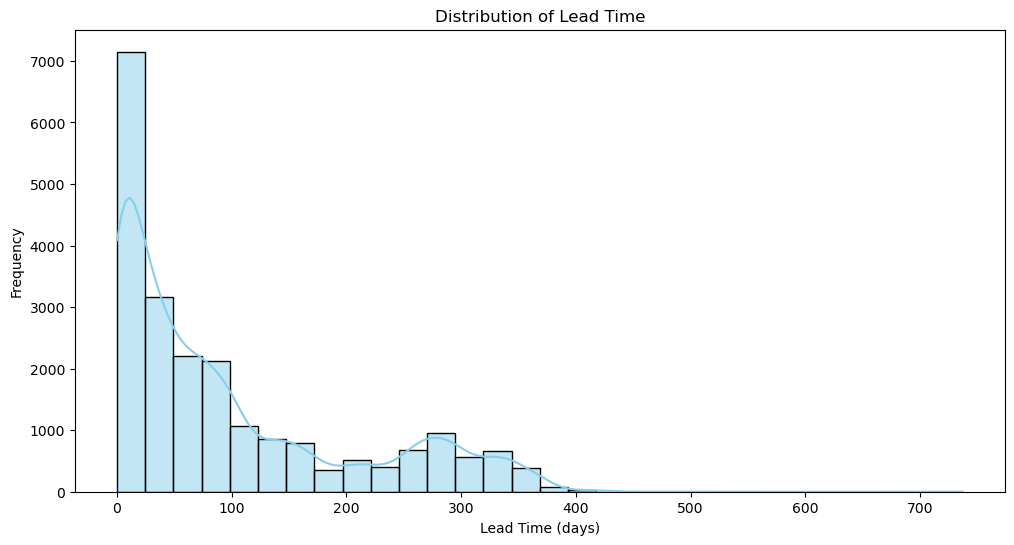

In [40]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()

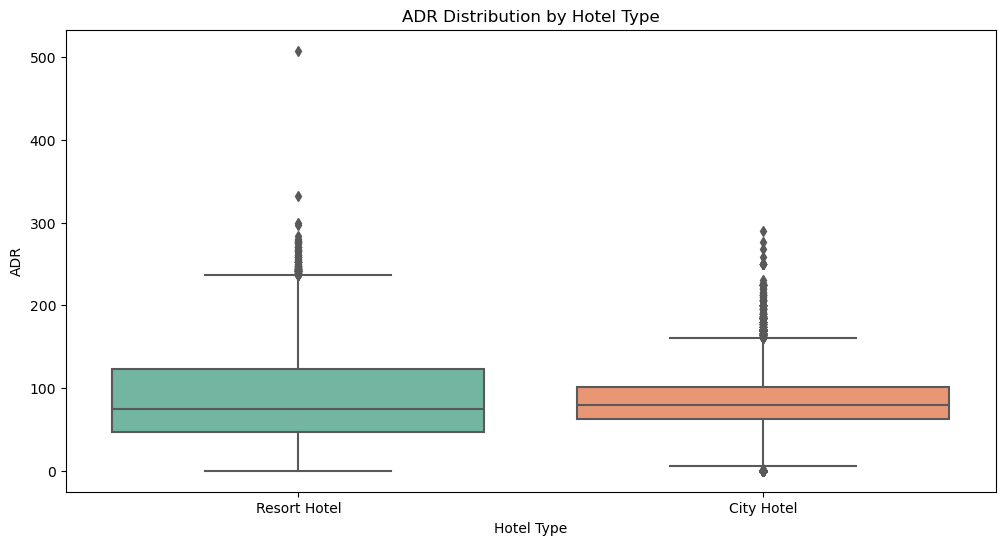

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hotel', y='adr', palette='Set2')
plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

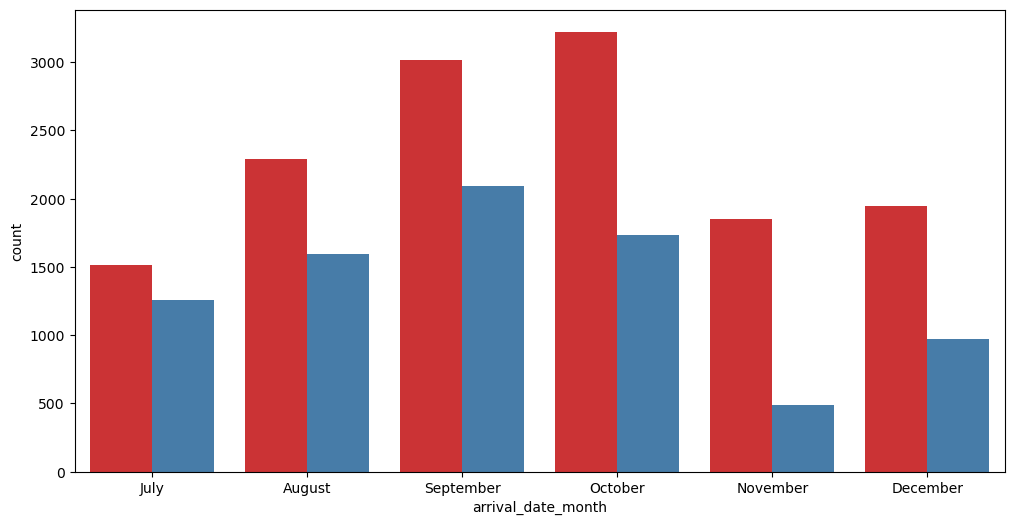

In [42]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled', palette='Set1')
plt.title('Monthly Cancellations Count')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='lead_time', y='adr', hue='is_canceled', palette='coolwarm', alpha=0.6)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()

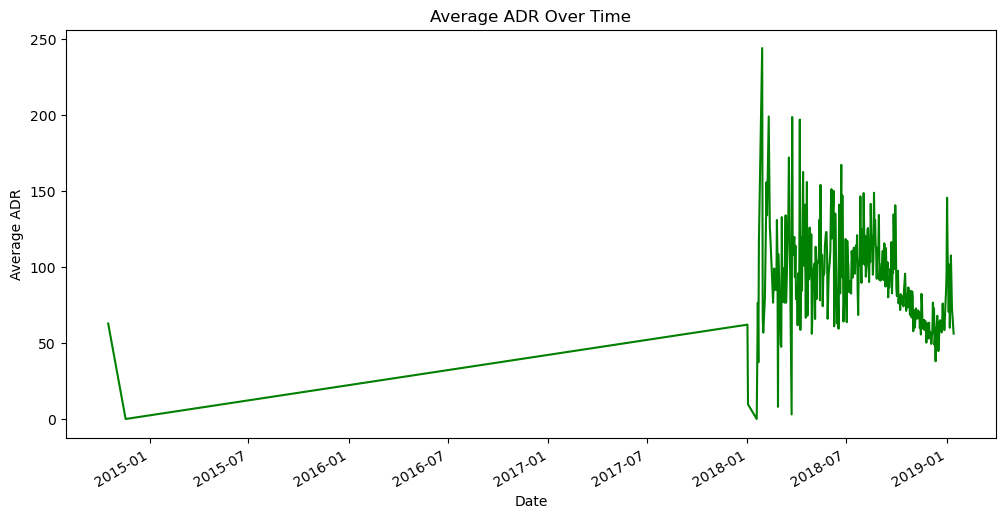

In [43]:

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

adr_over_time = df.groupby('reservation_status_date')['adr'].mean()

plt.figure(figsize=(12, 6))
adr_over_time.plot(kind='line', color='green')
plt.title('Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.show()

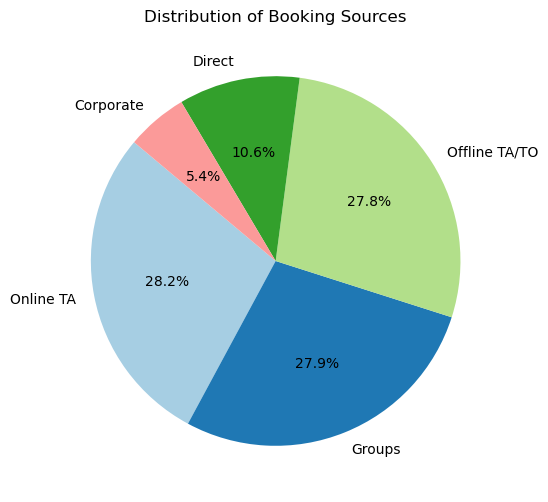

In [44]:
booking_source_distribution = df['market_segment'].value_counts().sort_values(ascending = False).head(5)

plt.figure(figsize=(10, 6))
plt.pie(booking_source_distribution, labels=booking_source_distribution.index, autopct='%1.1f%%',startangle = 140 ,colors=plt.cm.Paired(range(len(booking_source_distribution))))
plt.title('Distribution of Booking Sources')
plt.show()


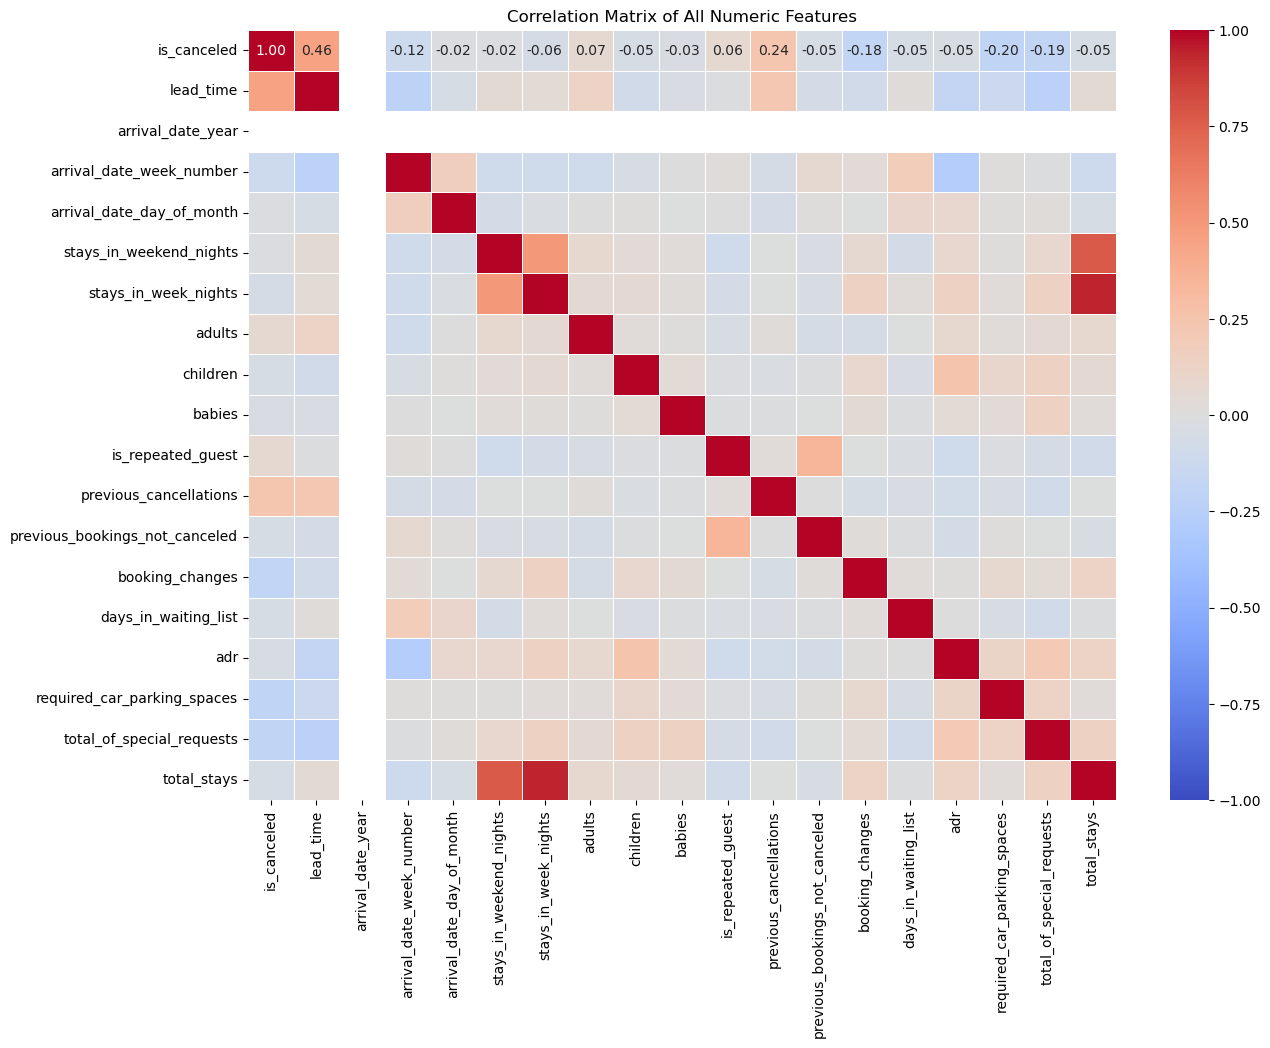

In [45]:
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

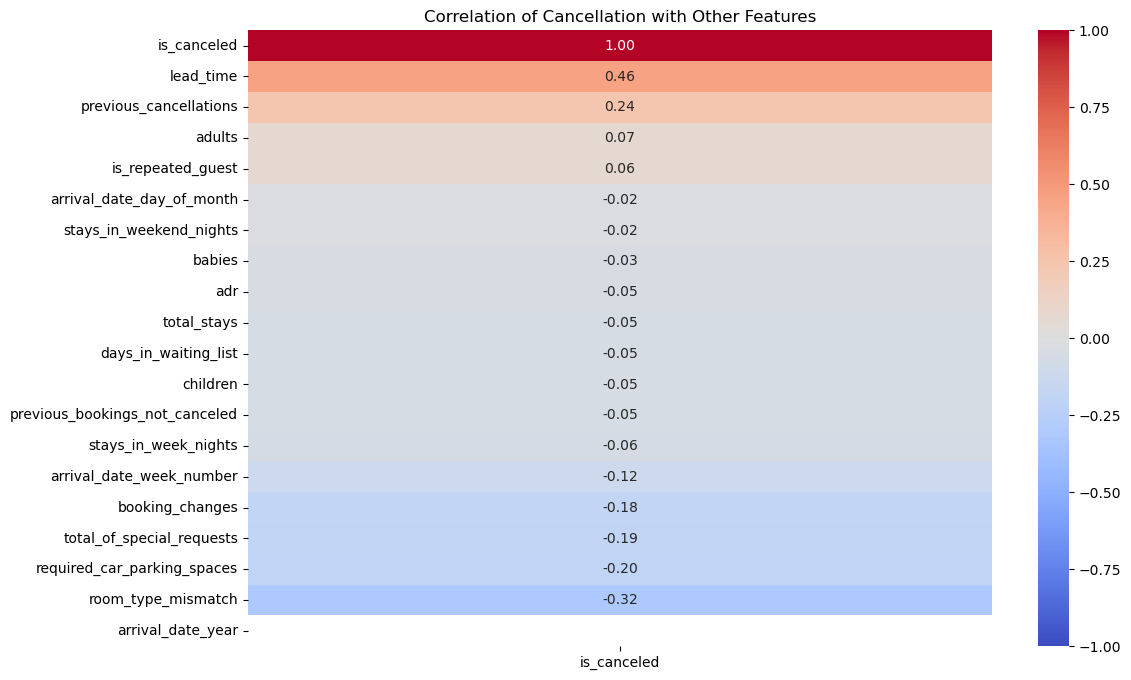

In [46]:
df['is_canceled'] = pd.to_numeric(df['is_canceled'], errors='coerce')

correlation_matrix = df.corr(numeric_only=True)

cancellation_correlation = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Cancellation with Other Features')
plt.show()

In [47]:
df.isna().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           133
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car

In [48]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,room_type_mismatch,total_stays,arrival_day_of_week,day_of_week,Cancellation_Status,year_month,adr_bin
0,Resort Hotel,1,85,2018,July,27,1,0,3,2,...,1,Canceled,2018-05-06,False,3,Sunday,Sunday,Canceled,2018-July,50-100
1,Resort Hotel,1,75,2018,July,27,1,0,3,2,...,0,Canceled,2018-04-22,False,3,Sunday,Sunday,Canceled,2018-July,100-150
2,Resort Hotel,1,23,2018,July,27,1,0,4,2,...,0,Canceled,2018-06-23,False,4,Sunday,Saturday,Canceled,2018-July,100-150
3,Resort Hotel,1,60,2018,July,27,1,2,5,2,...,2,Canceled,2018-05-11,False,7,Sunday,Friday,Canceled,2018-July,100-150
4,Resort Hotel,1,96,2018,July,27,1,2,8,2,...,2,Canceled,2018-05-29,False,10,Sunday,Tuesday,Canceled,2018-July,100-150


# 2019 Hotel Analysis Insights into Booking Cancellations and Patterns

In [49]:
df2=dataframes['2019']

In [50]:
for i in df2.describe(include='object').columns:
    print(i)
    print(df2[i].unique())

hotel
['Resort Hotel' 'City Hotel']
arrival_date_month
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']
meal
['BB' 'HB' 'Undefined' 'FB' 'SC']
country
['PRT' nan 'GBR' 'ESP' 'CN' 'FRA' 'DEU' 'IRL' 'ARE' 'BRA' 'NLD' 'FIN'
 'CHE' 'TUN' 'BEL' 'USA' 'ARG' 'NOR' 'CHN' 'POL' 'DNK' 'ALB' 'ITA' 'RUS'
 'SWE' 'AUT' 'HKG' 'IND' 'CZE' 'LUX' 'GEO' 'DZA' 'MAR' 'AND' 'ROU' 'TUR'
 'MOZ' 'ZAF' 'GIB' 'AUS' 'URY' 'BLR' 'JEY' 'CYP' 'EST' 'ISR' 'GRC' 'LVA'
 'COL' 'GGY' 'KWT' 'SAU' 'VEN' 'UKR' 'AGO' 'OMN' 'KOR' 'CPV' 'HUN' 'IDN'
 'TWN' 'HND' 'SRB' 'JPN' 'SVN' 'PAK' 'AZE' 'SGP' 'HRV' 'MEX' 'CHL' 'LBN'
 'NGA' 'ZMB' 'QAT' 'NZL' 'SVK' 'KHM' 'PHL' 'LTU' 'MCO' 'BGD' 'KAZ' 'BGR'
 'IMN' 'TJK' 'THA' 'ARM' 'MDV' 'NIC' 'ISL' 'BEN' 'MAC' 'VGB' 'MUS' 'MLT'
 'EGY' 'CRI' 'IRN' 'TZA' 'JOR' 'MYS' 'GAB' 'MKD' 'ECU' 'BIH' 'VNM' 'GHA'
 'PER' 'SEN' 'TMP' 'GLP' 'KEN' 'PRI' 'JAM' 'CAF' 'CUB' 'CMR' 'COM' 'SUR'
 'UGA' 'CIV' 'DOM' 'SYR' 'BDI' 'PLW' 'MWI' 'IRQ' 'RWA' 'BF

In [51]:
df2.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             409
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             10792
company                           74754


In [52]:
df2['country']=df2['country'].fillna('undefined')

In [53]:
df2['children' ]=df2['children' ].fillna(0)

In [54]:
df2= df2.drop(columns = ['agent','company'])

In [55]:
df2.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [56]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79264 entries, 0 to 79263
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   hotel                           79264 non-null  object        
 1   is_canceled                     79264 non-null  int64         
 2   lead_time                       79264 non-null  int64         
 3   arrival_date_year               79264 non-null  int64         
 4   arrival_date_month              79264 non-null  object        
 5   arrival_date_week_number        79264 non-null  int64         
 6   arrival_date_day_of_month       79264 non-null  int64         
 7   stays_in_weekend_nights         79264 non-null  int64         
 8   stays_in_week_nights            79264 non-null  int64         
 9   adults                          79264 non-null  int64         
 10  children                        79264 non-null  float64       
 11  ba

In [57]:
canceled_by_resort=df2[df2['hotel']=='Resort Hotel']['is_canceled'].value_counts()
canceled_by_resort

is_canceled
0    19813
1     7538
Name: count, dtype: int64

In [58]:
canceled_by_city=df2[df2['hotel']=='City Hotel']['is_canceled'].value_counts()
canceled_by_city

is_canceled
0    30499
1    21414
Name: count, dtype: int64

In [59]:
cancelation_counts=df2['is_canceled'].value_counts()
not_canceled=cancelation_counts[0]
canceled=cancelation_counts[1]
difference=not_canceled-canceled
print("Total canceled bookings:",canceled)
print("Total non canceled bookings:",not_canceled)
print("Difference between canceled and non canceled bookings:",difference)

Total canceled bookings: 28952
Total non canceled bookings: 50312
Difference between canceled and non canceled bookings: 21360


There were 28,952 canceled bookings and 50,312 non-canceled bookings, resulting in 21,360 more non-canceled bookings than canceled ones.

In [60]:
cancelation_counts=df2['is_canceled'].value_counts()
cancelation_counts

is_canceled
0    50312
1    28952
Name: count, dtype: int64

In [134]:
df2['total_stays_hotel']=df2['stays_in_weekend_nights']+df2['stays_in_week_nights']
stays_length_cancelation=df2.groupby('total_stays_hotel')['is_canceled'].mean()
stays_length_cancelation

total_stays_hotel
0     0.045375
1     0.250105
2     0.454615
3     0.406284
4     0.354243
5     0.317329
6     0.391355
7     0.320602
8     0.357323
9     0.358657
10    0.274105
11    0.238683
12    0.419580
13    0.333333
14    0.255776
15    0.508475
16    0.652174
17    0.266667
18    0.666667
19    0.666667
20    0.928571
21    0.650000
22    0.333333
23    0.857143
24    0.750000
25    1.000000
26    1.000000
27    1.000000
28    0.357143
29    0.800000
30    0.833333
33    1.000000
34    0.000000
35    0.000000
42    0.666667
46    0.000000
48    0.000000
49    0.000000
57    0.000000
60    0.000000
69    0.000000
Name: is_canceled, dtype: float64

In [62]:
cancelation_market=df2.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
cancelation_market

market_segment
Undefined        1.000000
Groups           0.628345
Offline TA/TO    0.345194
Online TA        0.342611
Aviation         0.228346
Corporate        0.163602
Direct           0.156413
Complementary    0.119850
Name: is_canceled, dtype: float64

The "Groups" segment also shows a high cancellation rate of 62.8%. Other segments like "Offline TA/TO" and "Online TA" have moderate cancellation rates of 34.5% and 34.2%, respectively. The "Corporate" segment has a lower cancellation rate of 16.3%, and "Direct" bookings show a rate of 15.6%. The "Complementary" segment has the lowest cancellation rate at 11.9%. This indicates that cancellations are more prevalent in certain market segments, with "Groups" having significantly higher rates compared to others.

In [63]:
df2['country'] = df2['country'].map(country_mapping)

In [64]:
df2['country'].value_counts()

country
Portugal                 36115
United Kingdom            6943
France                    6542
Spain                     5975
Germany                   4391
                         ...  
Zimbabwe                     1
Sao Tome and Principe        1
Saint Kitts and Nevis        1
Ethiopia                     1
Myanmar                      1
Name: count, Length: 97, dtype: int64

In [65]:
cancelation_by_counrty=df2.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
cancelation_by_country

country
PRT            0.569775
not defined    0.240602
ITA            0.228519
MOZ            0.166667
IRL            0.136082
                 ...   
BGR            0.000000
IND            0.000000
IDN            0.000000
HUN            0.000000
KNA            0.000000
Name: is_canceled, Length: 99, dtype: float64

Portugal has the highest cancellation rate at about 57% among the top countries. After Portugal, the cancellation rates drop for Undefined locations, Italy, Mozambique, and Ireland. Portugal has the biggest problem with cancellations compared to the other countries.

In [66]:
cancelation_deposit=df2.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)
cancelation_deposit

deposit_type
Non Refund    0.991975
No Deposit    0.268979
Refundable    0.074074
Name: is_canceled, dtype: float64

These analysis shows that "No Deposit" bookings have a 26.8% cancellation rate, while "Non Refund" bookings are almost always canceled at 99.1%. "Refundable" bookings have a 7.4%% cancellation rate. This shows that higher cancellation rates are associated with bookings that require no deposit or non-refundable deposits

In [67]:
cancellation_rate = df2.groupby('previous_cancellations')['is_canceled'].mean()
print("Cancellation Rate based on Previous Cancellations:")
print(cancellation_rate)

Cancellation Rate based on Previous Cancellations:
previous_cancellations
0     0.315603
1     0.969950
2     0.405063
3     0.305085
4     0.083333
5     0.153846
6     1.000000
11    0.285714
13    0.916667
14    1.000000
19    1.000000
21    1.000000
24    1.000000
25    1.000000
26    1.000000
Name: is_canceled, dtype: float64


previous cancellation rate shows that bookings with four prior cancellations have a relatively low cancellation rate of 8.33%. However, if a booking has one prior cancellation, the cancellation rate jumps dramatically to 96.9%. For bookings with six or more previous cancellations, the cancellation rate is consistently at 100%. This indicates that the more previous cancellations a booking has, the higher the likelihood of it being canceled again.

In [68]:
special_requests_cancellation_rate = df2.groupby('total_of_special_requests')['is_canceled'].mean()
print("Cancellation rate based on special requests:")
print(special_requests_cancellation_rate)


Cancellation rate based on special requests:
total_of_special_requests
0    0.471449
1    0.186493
2    0.201934
3    0.188737
4    0.118056
5    0.055556
Name: is_canceled, dtype: float64


Cancellation rates decrease with the number of special requests. Bookings with 0 special requests have a 47.1% cancellation rate, while those with 5 special requests have lowest cancellations rate that is 5.5%. This suggests that more special requests are associated with a lower likelihood of cancellation.

In [69]:
df2['room_type_mismatch'] = df2['reserved_room_type'] != df2['assigned_room_type']
room_type_mismatch_cancellation_rate = df2.groupby('room_type_mismatch')['is_canceled'].mean()
print("Cancellation Rate based on Room Type Mismatch:")
print(room_type_mismatch_cancellation_rate)


Cancellation Rate based on Room Type Mismatch:
room_type_mismatch
False    0.418850
True     0.050091
Name: is_canceled, dtype: float64


Bookings with a mismatch in room types have a cancellation rate of just 5.0%, compared to 41.8% for those where the room types match. This indicates that mismatches in room type are associated with fewer cancellations

In [70]:
customer_type_cancellation_rate = df2.groupby('customer_type')['is_canceled'].mean()
print("Cancellation Rate by Customer Type:")
print(customer_type_cancellation_rate)


Cancellation Rate by Customer Type:
customer_type
Contract           0.346367
Group              0.124309
Transient          0.395755
Transient-Party    0.283931
Name: is_canceled, dtype: float64


Transient customers have the highest cancellation rate at 39.5%. This is followed by Contract at 34.6%, Transient-Party at 28.3%, and Group with the lowest rate at 12.4%. This suggests that Group bookings are less likely to be canceled compared to other customer types.

In [71]:
adults_cancellation_rate = df2.groupby('adults')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate based on Number of Adults:")
print(adults_cancellation_rate)

Cancellation Rate based on Number of Adults:
adults
5     1.000000
6     1.000000
10    1.000000
20    1.000000
26    1.000000
27    1.000000
40    1.000000
50    1.000000
55    1.000000
2     0.388791
3     0.300531
1     0.292526
0     0.248175
4     0.175000
Name: is_canceled, dtype: float64


In [72]:
children_cancellation_rate = df2.groupby('children')['is_canceled'].mean()
print("Cancellation Rate based on Number of Children:")
print(children_cancellation_rate)

Cancellation Rate based on Number of Children:
children
0.0     0.367495
1.0     0.293301
2.0     0.386364
3.0     0.230769
10.0    1.000000
Name: is_canceled, dtype: float64


In [73]:
babies_cancellation_rate = df2.groupby('babies')['is_canceled'].mean()
print("Cancellation Rate based on Number of Babies:")
print(babies_cancellation_rate)

Cancellation Rate based on Number of Babies:
babies
0     0.366598
1     0.207373
2     0.200000
9     0.000000
10    0.000000
Name: is_canceled, dtype: float64


In [74]:
monthly_cancellation_rate = df2.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate by Arrival Month:")
print(monthly_cancellation_rate)


Cancellation Rate by Arrival Month:
arrival_date_month
June         0.396070
September    0.392164
February     0.391180
August       0.382675
October      0.380842
April        0.379698
July         0.376104
May          0.349580
December     0.347940
November     0.313849
March        0.308471
January      0.273937
Name: is_canceled, dtype: float64


In [75]:
Reservationyear_cancellation_rate = df2.groupby(df2['reservation_status_date'].dt.year)['is_canceled'].mean()
print("Cancellation rate by reservation year:")
print(Reservationyear_cancellation_rate)

Cancellation rate by reservation year:
reservation_status_date
2014    1.000000
2018    1.000000
2019    0.337012
2020    0.000000
Name: is_canceled, dtype: float64


Highest cancellation rate done in 2014 and 2018 that is 100%,in 2019 there is 33.7% and in 2020 there is no cancellation done.

In [76]:
distribution_channel_cancellation_rate = df2.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate by Distribution Channel:")
print(distribution_channel_cancellation_rate)

Cancellation Rate by Distribution Channel:
distribution_channel
Undefined    0.800000
TA/TO        0.404567
Corporate    0.209954
GDS          0.209524
Direct       0.180945
Name: is_canceled, dtype: float64


Bookings made through "Undefined" sources have the highest cancellation rates, whereas bookings from "Direct" sources have the lowest cancellation rates.

In [77]:
df2['arrival_day_of_week'] = pd.to_datetime(df2['arrival_date_year'].astype(str) + '-' + 
                                        df2['arrival_date_month'].astype(str) + '-' + 
                                        df2['arrival_date_day_of_month'].astype(str)).dt.day_name()
day_of_week_cancellation_rate = df2.groupby('arrival_day_of_week')['is_canceled'].mean().sort_values(ascending=False)

print("Cancellation Rate by Day of the Week:")
print(day_of_week_cancellation_rate)


Cancellation Rate by Day of the Week:
arrival_day_of_week
Sunday       0.405883
Tuesday      0.390092
Monday       0.375317
Thursday     0.373714
Saturday     0.350131
Wednesday    0.335215
Friday       0.308822
Name: is_canceled, dtype: float64


Sunday have the highest cancellation rate at about 40.5%. Tuesaday,Mondays and Thursday also see a lot of cancellations. 

In [78]:
pivot = pd.pivot_table(df2, values='is_canceled', index=['market_segment', 'customer_type'], aggfunc=np.mean)

print("Pivot Table of Cancellation Rate by Market Segment and Customer Type:")
pivot


Pivot Table of Cancellation Rate by Market Segment and Customer Type:


is_canceled
market_segment customer_type               
Aviation       Transient           0.209091
               Transient-Party     0.352941
Complementary  Contract            0.000000
               Group               0.000000
               Transient           0.123506
               Transient-Party     0.074074
Corporate      Contract            0.181818
               Group               0.125000
               Transient           0.147617
               Transient-Party     0.191964
Direct         Contract            0.142857
               Group               0.209877
               Transient           0.155165
               Transient-Party     0.163352
Groups         Contract            1.000000
               Group               0.000000
               Transient           0.943446
               Transient-Party     0.361327
Offline TA/TO  Contract            0.077506
               Group               0.119403
               Transient           0.429141
               Transient-Party     0.271782
Online TA      Contract            0.256513
               Group               0.085470
               Transient           0.362580
               Transient-Party     0.158225
Undefined      Transient-Party     1.000000

In [79]:
correlation_matrix = df2.corr(numeric_only=True)
print("Correlation with Cancellation:")
print(correlation_matrix['is_canceled'].sort_values(ascending=False))

Correlation with Cancellation:
is_canceled                       1.000000
lead_time                         0.327324
previous_cancellations            0.140908
days_in_waiting_list              0.067744
adults                            0.050624
adr                               0.017388
stays_in_week_nights              0.010468
arrival_date_week_number          0.004929
total_stays_hotel                 0.003127
children                         -0.008254
arrival_date_day_of_month        -0.009069
stays_in_weekend_nights          -0.011874
babies                           -0.028333
previous_bookings_not_canceled   -0.052065
is_repeated_guest                -0.060299
booking_changes                  -0.145542
required_car_parking_spaces      -0.200884
total_of_special_requests        -0.246102
room_type_mismatch               -0.269907
arrival_date_year                      NaN
Name: is_canceled, dtype: float64


is_canceled
0    0.63474
1    0.36526
Name: proportion, dtype: float64


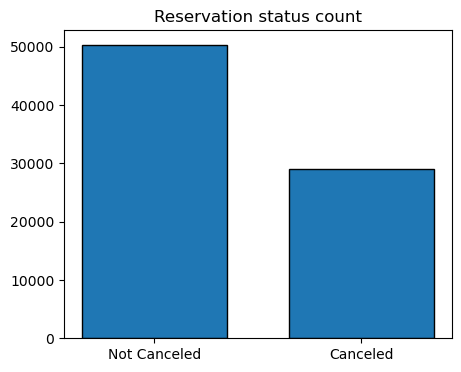

In [80]:
cancelled_perc = df2["is_canceled"].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))

plt.title("Reservation status count")

plt.bar(["Not Canceled","Canceled"],df2["is_canceled"].value_counts(),edgecolor="k",width = 0.7)
plt.show()

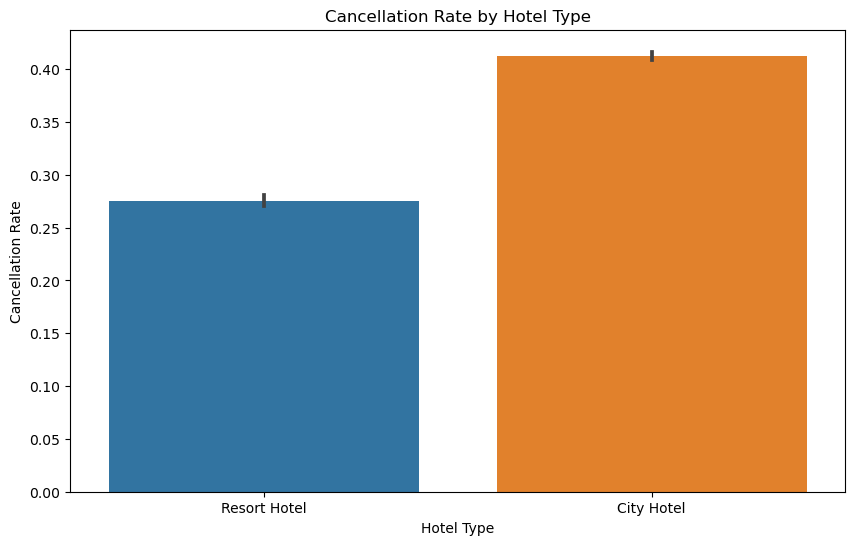

In [81]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hotel', y='is_canceled', data=df2, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Cancellation Rate')
plt.show()

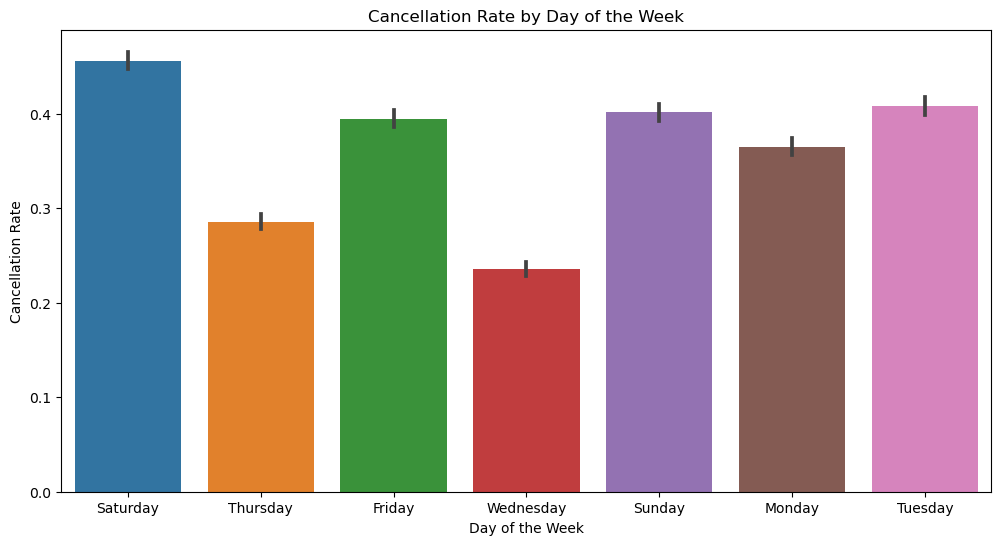

In [82]:
df2['day_of_week'] = df2['reservation_status_date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='is_canceled', data=df2, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate')
plt.show()

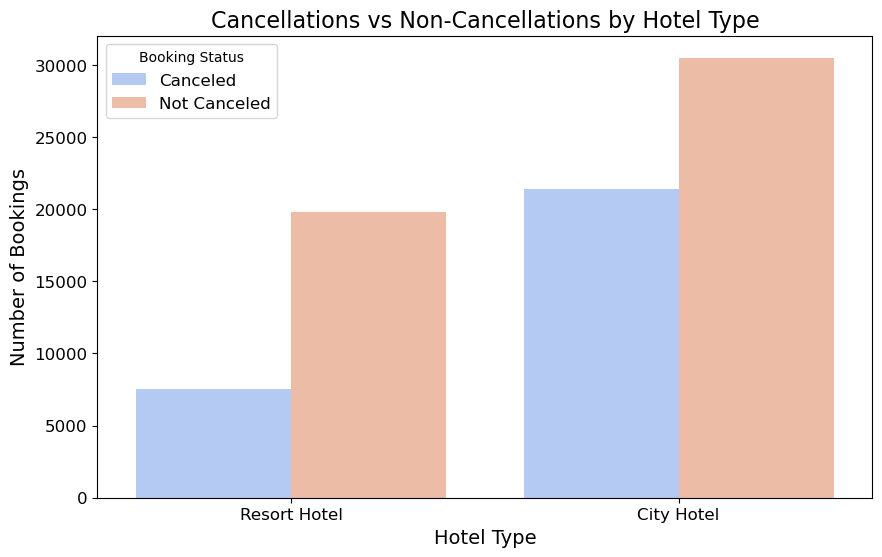

In [83]:
df2['Cancellation_Status'] = df2['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')

plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='hotel', hue='Cancellation_Status', palette='coolwarm')

plt.title('Cancellations vs Non-Cancellations by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(title='Booking Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

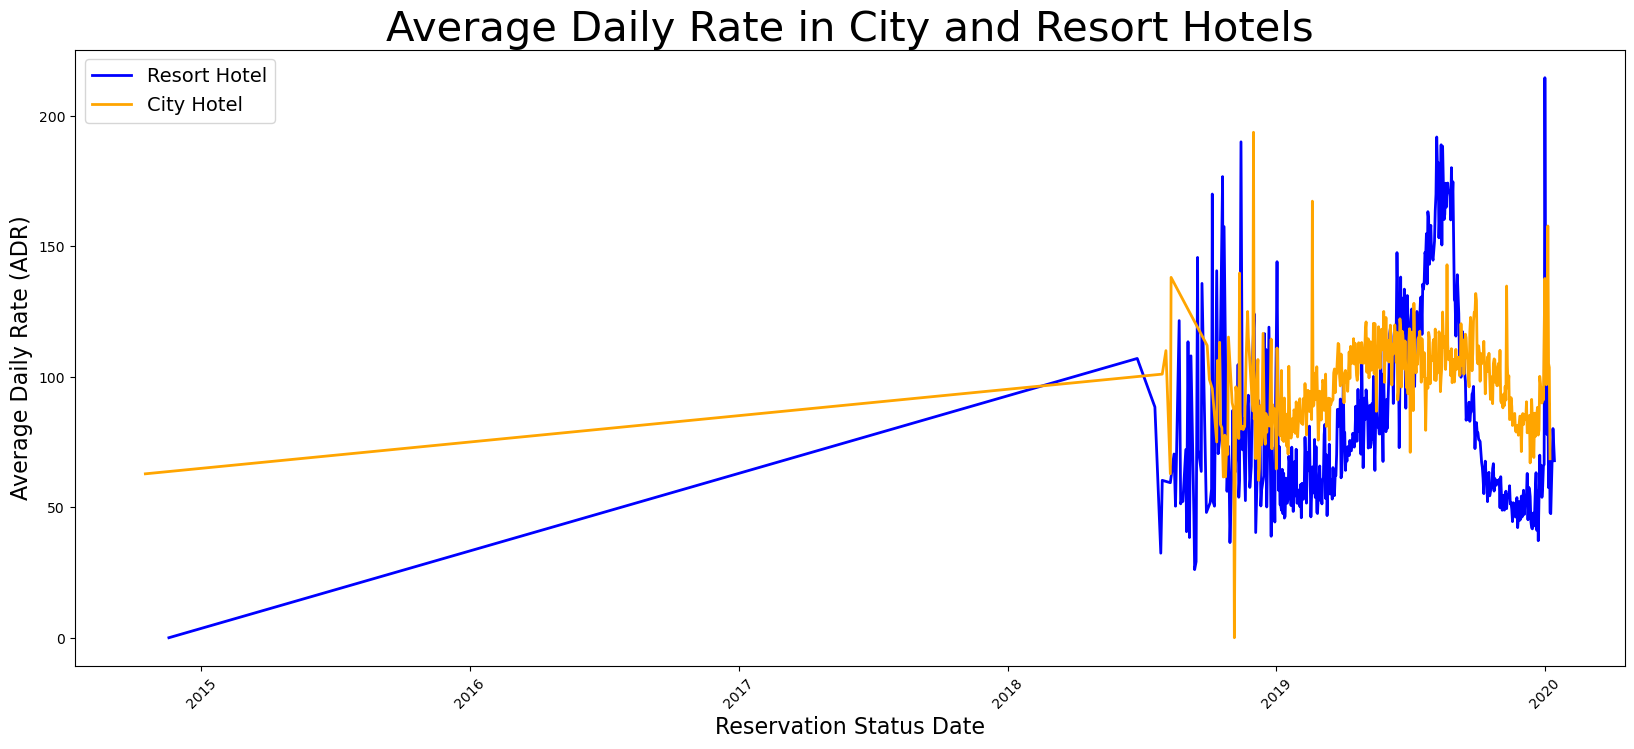

In [84]:
resort_hotel = df2[df2['hotel'] == 'Resort Hotel']
city_hotel = df2[df2['hotel'] == 'City Hotel']

resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel_cancellation = city_hotel['is_canceled'].value_counts(normalize=True)

resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate in City and Resort Hotels", fontsize=30)

plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel', color='blue', linewidth=2)

plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel', color='orange', linewidth=2)

plt.xlabel('Reservation Status Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=14)

plt.show()

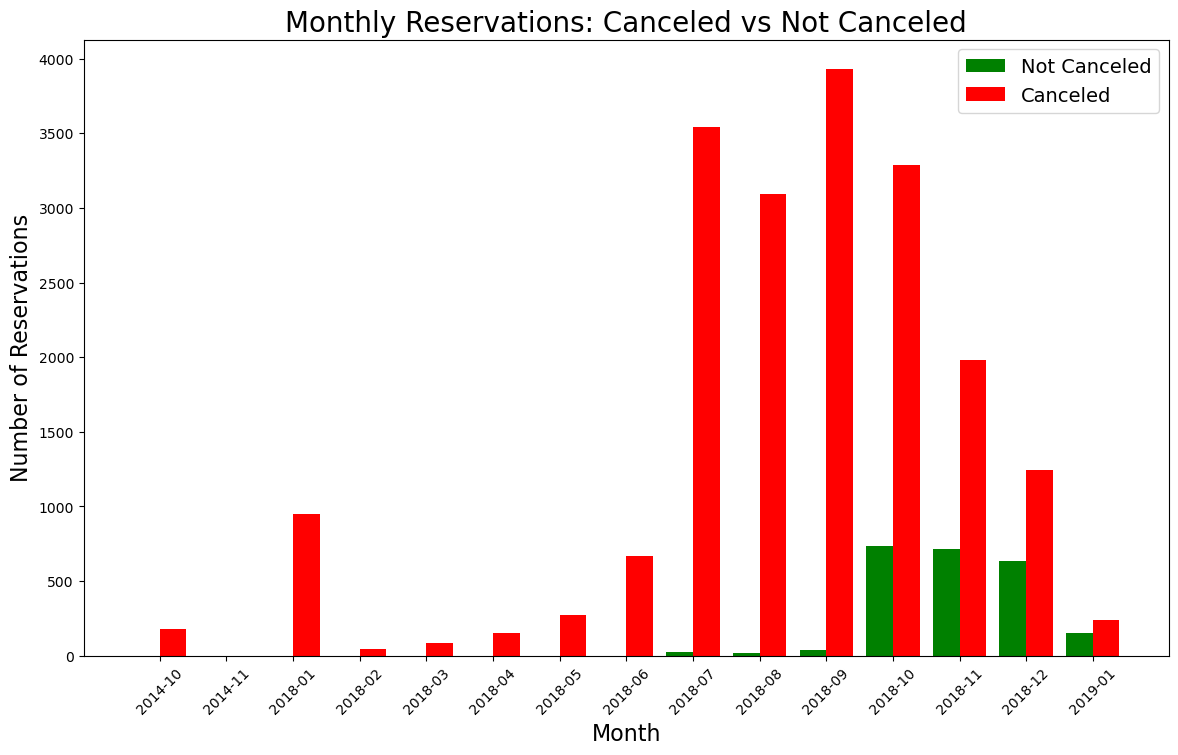

In [85]:
df2['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df2['reservation_month'] = df2['reservation_status_date'].dt.to_period('M')

monthly_reservations = df2.groupby(['reservation_month', 'is_canceled']).size().unstack(fill_value=0)

monthly_reservations = monthly_reservations.reset_index()

monthly_reservations.columns = ['Month', 'Not Canceled', 'Canceled']
plt.figure(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(monthly_reservations['Month']))

plt.bar(index, monthly_reservations['Not Canceled'], bar_width, label='Not Canceled', color='green')

plt.bar(index + bar_width, monthly_reservations['Canceled'], bar_width, label='Canceled', color='red')

plt.title('Monthly Reservations: Canceled vs Not Canceled', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Reservations', fontsize=16)
plt.xticks(index + bar_width / 2, monthly_reservations['Month'].astype(str), rotation=45)
plt.legend(fontsize=14)

plt.show()

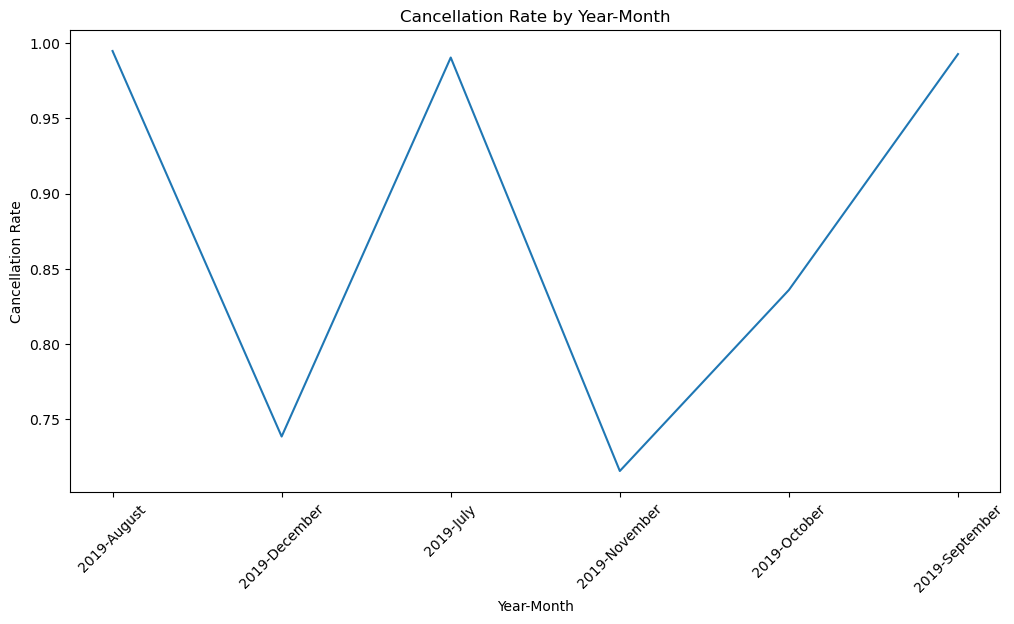

In [86]:
df2['year_month'] = df2['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']
year_month_cancellation_rate = df2.groupby('year_month')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
year_month_cancellation_rate.plot()
plt.title('Cancellation Rate by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


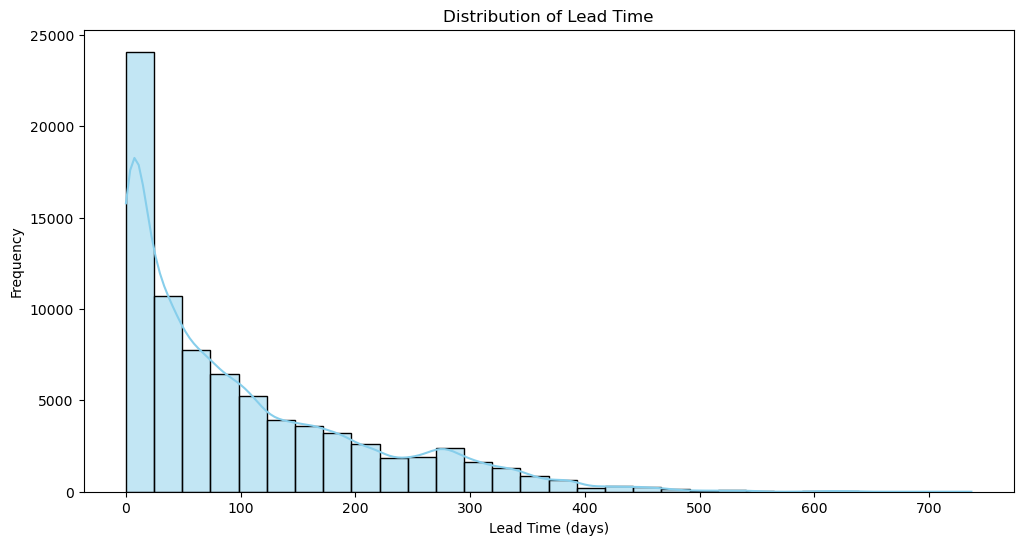

In [87]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df2['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


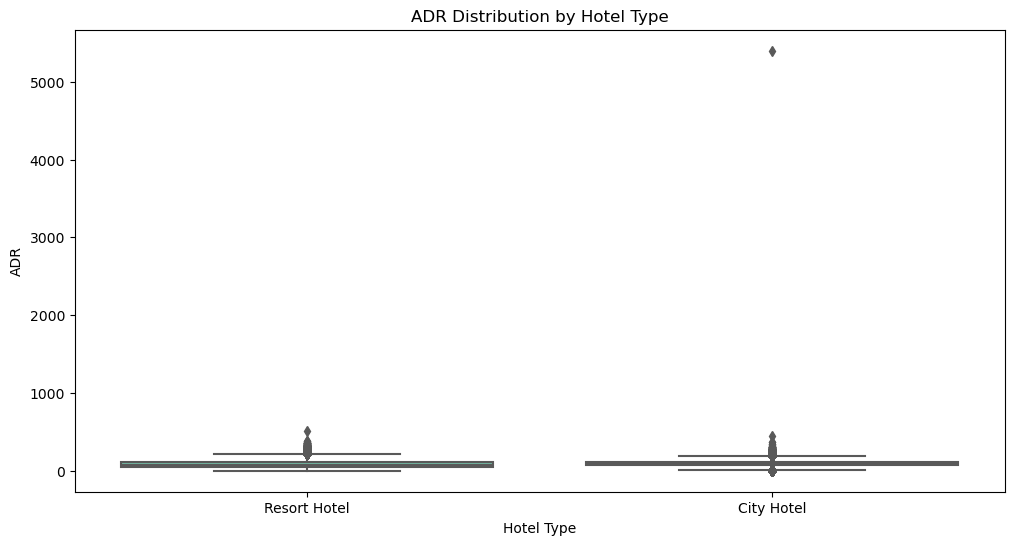

In [88]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df2, x='hotel', y='adr', palette='Set2')
plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

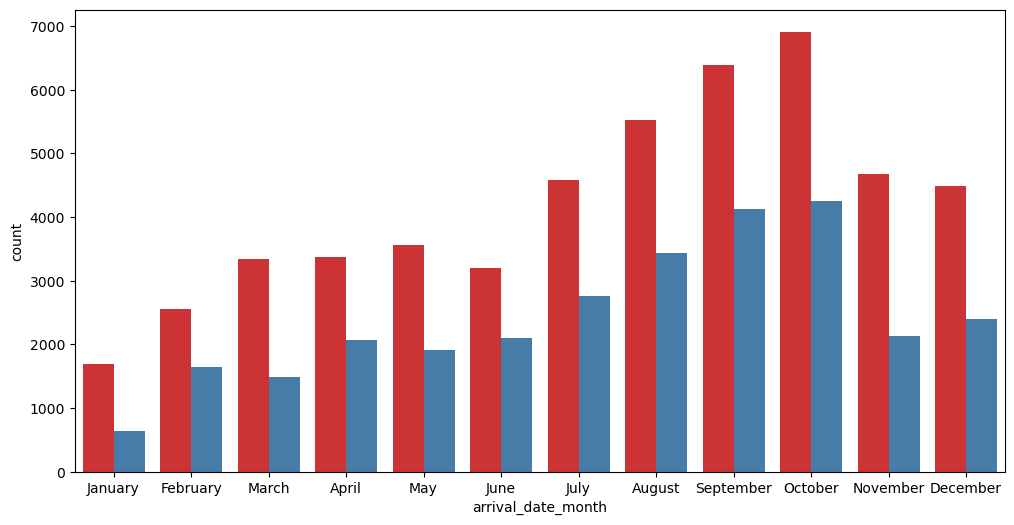

In [89]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df2, x='arrival_date_month', hue='is_canceled', palette='Set1')
plt.title('Monthly Cancellations Count')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


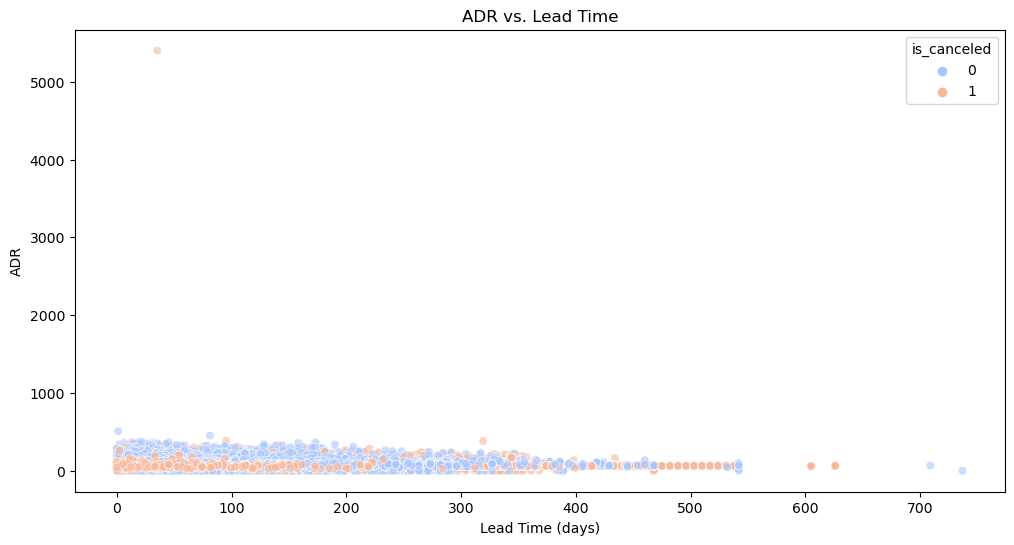

In [90]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df2, x='lead_time', y='adr', hue='is_canceled', palette='coolwarm', alpha=0.6)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()


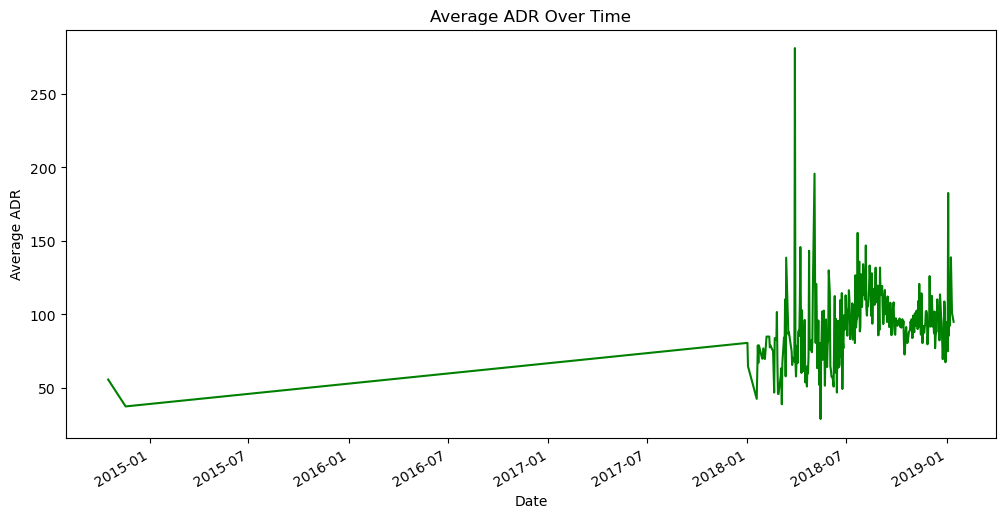

In [91]:
df2['reservation_status_date'] = pd.to_datetime(df2['reservation_status_date'])

adr_over_time = df2.groupby('reservation_status_date')['adr'].mean()

plt.figure(figsize=(12, 6))
adr_over_time.plot(kind='line', color='green')
plt.title('Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.show()

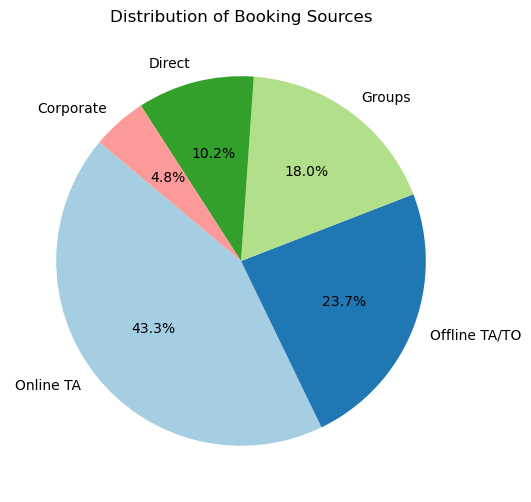

In [92]:
booking_source_distribution = df2['market_segment'].value_counts().sort_values(ascending = False).head(5)

plt.figure(figsize=(10, 6))
plt.pie(booking_source_distribution, labels=booking_source_distribution.index, autopct='%1.1f%%',startangle = 140 ,colors=plt.cm.Paired(range(len(booking_source_distribution))))
plt.title('Distribution of Booking Sources')
plt.show()


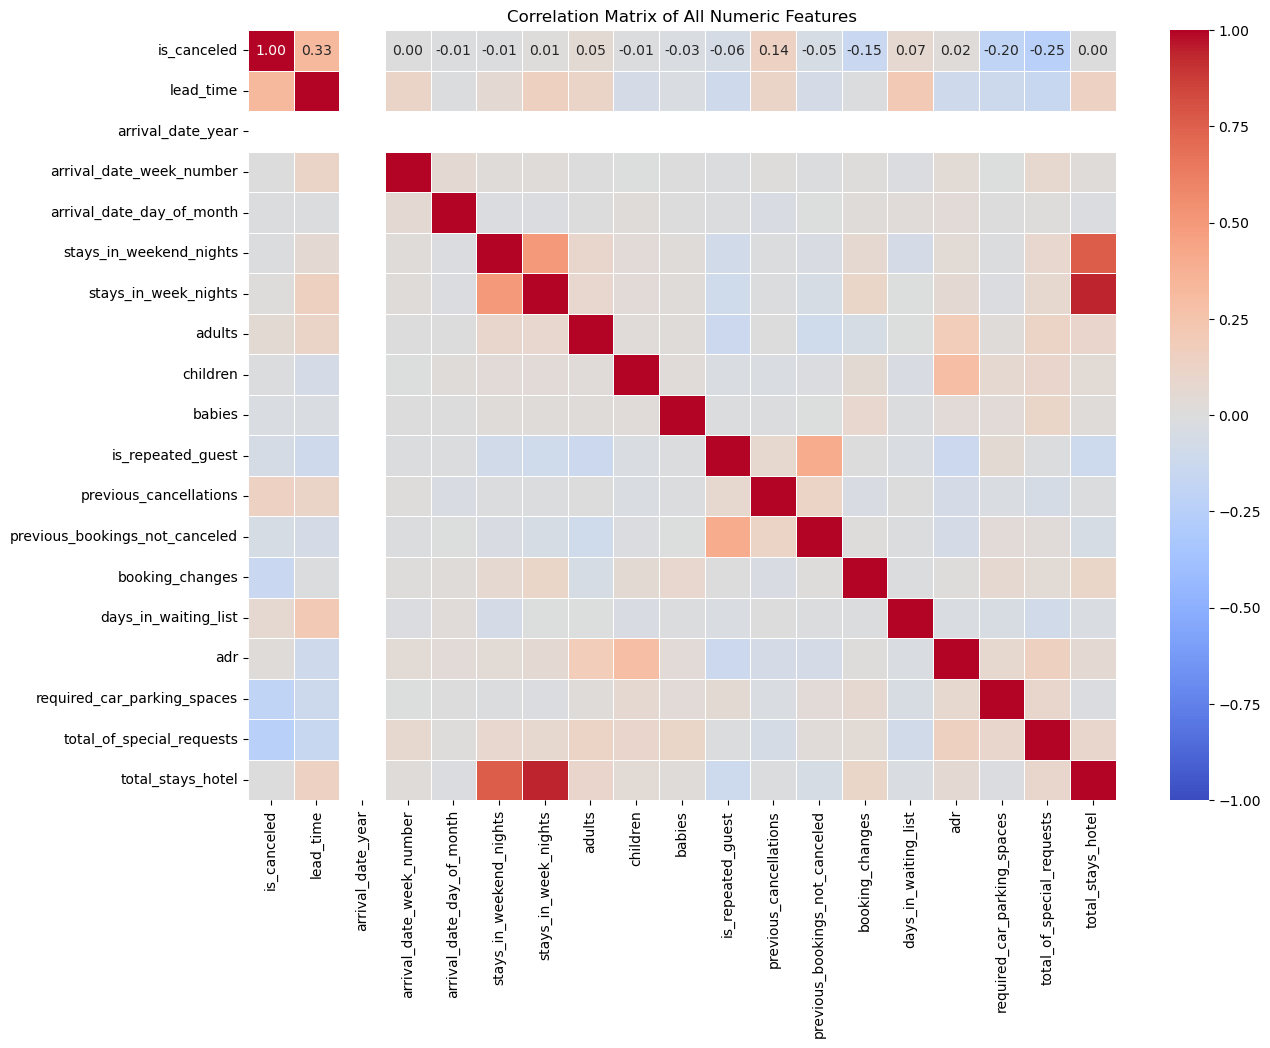

In [93]:
df2_numeric = df2.select_dtypes(include=['number'])
correlation_matrix = df2_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

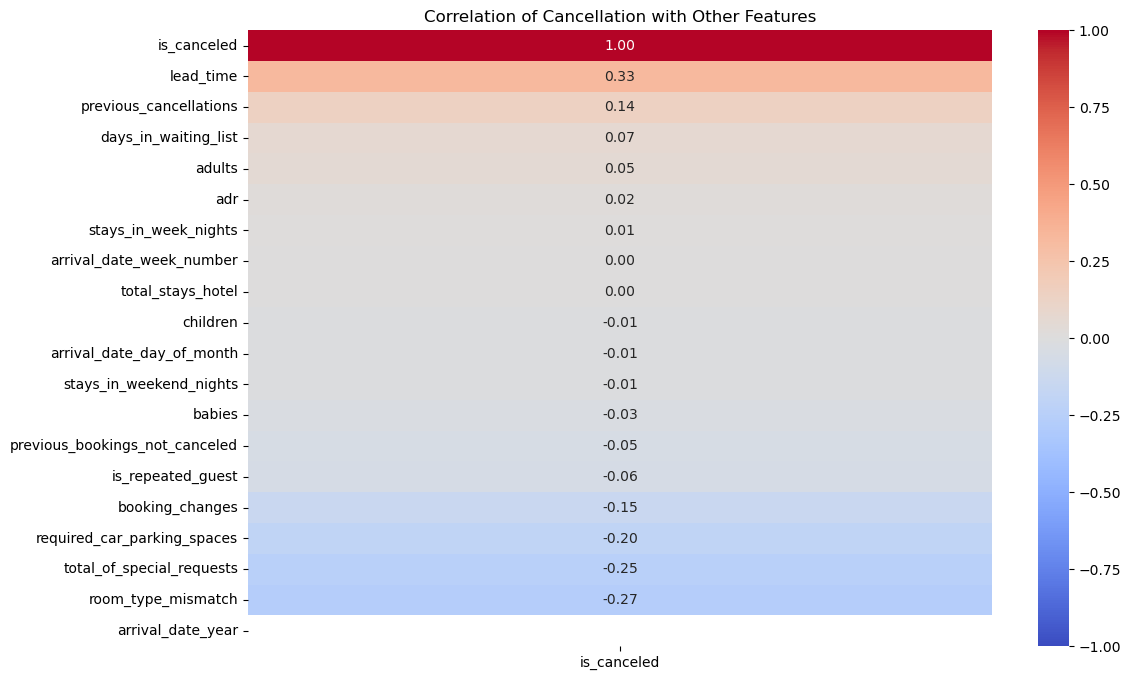

In [94]:
df2['is_canceled'] = pd.to_numeric(df2['is_canceled'], errors='coerce')

correlation_matrix = df2.corr(numeric_only=True)

cancellation_correlation = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Cancellation with Other Features')
plt.show()

# 2020 Hotel Analysis Insights into Booking Cancellations and Patterns

In [95]:
df3=dataframes['2020']

In [96]:
df3.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              0
babies                                0
meal                                  0
country                              83
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                              5664
company                           38377


In [97]:
df3['country']=df3['country'].fillna('undefined')

In [98]:
df3 = df3.drop(columns = ['agent','company'])

In [99]:
df3.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [100]:
cancelation_counts=df3['is_canceled'].value_counts()
not_canceled=cancelation_counts[0]
canceled=cancelation_counts[1]
diff=not_canceled-canceled
print("Total canceled bookings:",canceled)
print("Total non canceled bookings:",not_canceled)
print("Difference between canceled and non canceled bookings:",diff)

Total canceled bookings: 15745
Total non canceled bookings: 24942
Difference between canceled and non canceled bookings: 9197


There were 15,745  canceled bookings and24,9422 non-canceled bookings, resulting in9,1970 more non-canceled bookings than canceled ones.

In [101]:
cancelation_counts=df3['is_canceled'].value_counts()
cancelation_counts

is_canceled
0    24942
1    15745
Name: count, dtype: int64

In [102]:
canceled_resort=df3[df3['hotel']=='Resort Hotel']['is_canceled'].value_counts()
canceled_resort

is_canceled
0    9125
1    4054
Name: count, dtype: int64

In [103]:
canceled_city=df3[df3['hotel']=='City Hotel']['is_canceled'].value_counts()
canceled_city

is_canceled
0    15817
1    11691
Name: count, dtype: int64

In [104]:
cancellation_market=df3.groupby('market_segment')['is_canceled'].mean().sort_values(ascending=False)
cancellation_market

market_segment
Groups           0.581141
Online TA        0.408680
Offline TA/TO    0.337745
Corporate        0.254802
Aviation         0.209091
Complementary    0.163551
Direct           0.154677
Name: is_canceled, dtype: float64

The "Groups" segment also shows a high cancellation rate of 58.1%. Other segments like "Online TA" and "Offline TA/TO" have moderate cancellation rates of 40.8% and 33.7%, respectively. The "Corporate" segment has a lower cancellation rate of 25.4%, and "Aviation" bookings show a rate of 20.9%. The "Direct" segment has the lowest cancellation rate at 15.4% and "Complementary" segment cancellation is 16.3%. This indicates that cancellations are more prevalent in certain market segments, with "Groups" having significantly higher rates compared to others.

In [105]:
cancellation_deposit=df3.groupby('deposit_type')['is_canceled'].mean().sort_values(ascending=False)
cancellation_deposit

deposit_type
Non Refund    0.998061
Refundable    0.962963
No Deposit    0.317540
Name: is_canceled, dtype: float64

These analysis shows that "Refundable" bookings have a 96.2% cancellation rate, while "Non Refund" bookings are almost always canceled at 99.8%. "No Deposit" bookings have a 31.7% cancellation rate. This shows that higher cancellation rates are associated with bookings that require no deposit or non-refundable deposits.

In [106]:
cancelation_by_counrty=df3.groupby('country')['is_canceled'].mean().sort_values(ascending=False)
cancelation_by_country

country
PRT            0.569775
not defined    0.240602
ITA            0.228519
MOZ            0.166667
IRL            0.136082
                 ...   
BGR            0.000000
IND            0.000000
IDN            0.000000
HUN            0.000000
KNA            0.000000
Name: is_canceled, Length: 99, dtype: float64

Portugal has the highest cancellation rate at about 56.9% among the top countries. After Portugal, the cancellation rates drop for Undefined locations, Italy, Mozambique, and Ireland. Portugal has the biggest problem with cancellations compared to the other countries.

In [107]:
cancellation_rate = df3.groupby('previous_cancellations')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate based on Previous Cancellations:")
print(cancellation_rate)

Cancellation Rate based on Previous Cancellations:
previous_cancellations
0    0.388453
3    0.333333
4    0.315789
1    0.174359
2    0.162162
5    0.000000
6    0.000000
Name: is_canceled, dtype: float64


previous cancellation rate shows that bookings of five and six prior has low cancellation rate is there no cancellation.However,the highest cancellation rate is 38.8% with no prior of cancellation rate. the higher the likelihood of it being canceled again.

In [108]:
special_requests_cancellation_rate = df3.groupby('total_of_special_requests')['is_canceled'].mean()
print("Cancellation rate based on special requests:")
print(special_requests_cancellation_rate)

Cancellation rate based on special requests:
total_of_special_requests
0    0.497661
1    0.279648
2    0.256202
3    0.168908
4    0.096939
5    0.045455
Name: is_canceled, dtype: float64


Cancellation rates decrease with the number of special requests. Bookings with 0 special requests have a 49.7% cancellation rate, while those with 5 special requests have lowest cancellations rate. This suggests that more special requests are associated with a lower likelihood of cancellation.


In [109]:
df3['room_type_mismatch'] = df3['reserved_room_type'] != df3['assigned_room_type']
room_type_mismatch_cancellation_rate = df3.groupby('room_type_mismatch')['is_canceled'].mean()
print("Cancellation Rate based on Room Type Mismatch:")
print(room_type_mismatch_cancellation_rate)

Cancellation Rate based on Room Type Mismatch:
room_type_mismatch
False    0.41578
True     0.07621
Name: is_canceled, dtype: float64


Bookings with a mismatch in room types have a cancellation rate of just 7.6%, compared to 41.5% for those where the room types match. This indicates that mismatches in room type are associated with fewer cancellations

In [110]:
customer_type_cancellation_rate = df3.groupby('customer_type')['is_canceled'].mean()
print("Cancellation Rate by Customer Type:")
print(customer_type_cancellation_rate)

Cancellation Rate by Customer Type:
customer_type
Contract           0.116314
Group              0.064220
Transient          0.432719
Transient-Party    0.171543
Name: is_canceled, dtype: float64


Contract Transient have the highest cancellation rate at 43.2%. Transient-party has 17.1% ,Contact has 11.6%, and Group with the lowest rate at 6.4%. This suggests that Group bookings are less likely to be canceled compared to other customer types.

In [111]:
adults_cancellation_rate = df3.groupby('adults')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate based on Number of Adults:")
print(adults_cancellation_rate)

Cancellation Rate based on Number of Adults:
adults
3    0.410938
4    0.409091
2    0.408866
0    0.323077
1    0.288985
Name: is_canceled, dtype: float64


In [112]:
children_cancellation_rate = df3.groupby('children')['is_canceled'].mean()
print("Cancellation Rate based on Number of Children:")
print(children_cancellation_rate)

Cancellation Rate based on Number of Children:
children
0    0.384441
1    0.368184
2    0.478203
3    0.216216
Name: is_canceled, dtype: float64


In [113]:
babies_cancellation_rate = df3.groupby('babies')['is_canceled'].mean()
print("Cancellation Rate based on Number of Babies:")
print(babies_cancellation_rate)

Cancellation Rate based on Number of Babies:
babies
0    0.388681
1    0.122530
2    0.000000
Name: is_canceled, dtype: float64


In [114]:
monthly_cancellation_rate = df3.groupby('arrival_date_month')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate by Arrival Month:")
print(monthly_cancellation_rate)


Cancellation Rate by Arrival Month:
arrival_date_month
May         0.437510
April       0.435082
June        0.431911
July        0.373424
August      0.368731
January     0.339582
March       0.336419
February    0.325353
Name: is_canceled, dtype: float64


In [115]:
Reservationyear_cancellation_rate = df3.groupby(df3['reservation_status_date'].dt.year)['is_canceled'].mean()
print("Cancellation rate by reservation year:")
print(Reservationyear_cancellation_rate)

Cancellation rate by reservation year:
reservation_status_date
2018    1.000000
2019    1.000000
2020    0.308894
Name: is_canceled, dtype: float64


Highest cancellation rate done in 2018 and 2019 that is 100%.In 2020 there is 30.8% cancellation is done.

In [116]:
distribution_channel_cancellation_rate = df3.groupby('distribution_channel')['is_canceled'].mean().sort_values(ascending=False)
print("Cancellation Rate by Distribution Channel:")
print(distribution_channel_cancellation_rate)

Cancellation Rate by Distribution Channel:
distribution_channel
TA/TO        0.426689
Corporate    0.258199
Direct       0.175855
GDS          0.170455
Name: is_canceled, dtype: float64


Bookings made through "TA/TO" sources have the highest cancellation rates, whereas bookings from "GDS" sources have the lowest cancellation rates.

In [135]:
df3['total_stays_hotel']=df3['stays_in_weekend_nights']+df3['stays_in_week_nights']
stays_length_cancelation=df3.groupby('total_stays_hotel')['is_canceled'].mean()
stays_length_cancelation

total_stays_hotel
0     0.076389
1     0.261532
2     0.414757
3     0.447061
4     0.387771
5     0.389588
6     0.413077
7     0.383383
8     0.442105
9     0.410714
10    0.389549
11    0.400000
12    0.487805
13    0.432432
14    0.337580
15    0.375000
16    0.411765
17    0.200000
18    0.913043
19    0.857143
20    1.000000
21    0.312500
22    0.200000
23    0.000000
24    1.000000
25    0.611111
26    1.000000
27    0.666667
28    0.500000
29    0.750000
30    0.857143
35    0.000000
38    0.000000
42    0.000000
43    0.000000
45    0.000000
56    0.500000
Name: is_canceled, dtype: float64

In [117]:
df3['arrival_day_of_week'] = pd.to_datetime(df3['arrival_date_year'].astype(str) + '-' + 
                                        df3['arrival_date_month'].astype(str) + '-' + 
                                        df3['arrival_date_day_of_month'].astype(str)).dt.day_name()
day_of_week_cancellation_rate = df3.groupby('arrival_day_of_week')['is_canceled'].mean().sort_values(ascending=False)

print("Cancellation Rate by Day of the Week:")
print(day_of_week_cancellation_rate)


Cancellation Rate by Day of the Week:
arrival_day_of_week
Tuesday      0.419265
Wednesday    0.412612
Monday       0.410905
Sunday       0.407380
Saturday     0.358133
Friday       0.357844
Thursday     0.333625
Name: is_canceled, dtype: float64


In [118]:
pivot = pd.pivot_table(df3, values='is_canceled', index=['market_segment', 'customer_type'], aggfunc=np.mean)

print("Pivot Table of Cancellation Rate by Market Segment and Customer Type:")
pivot


Pivot Table of Cancellation Rate by Market Segment and Customer Type:


is_canceled
market_segment customer_type               
Aviation       Group               0.000000
               Transient           0.212963
Complementary  Group               0.000000
               Transient           0.160194
               Transient-Party     0.400000
Corporate      Group               0.230769
               Transient           0.261475
               Transient-Party     0.231003
Direct         Group               0.018868
               Transient           0.162533
               Transient-Party     0.094563
Groups         Contract            0.000000
               Group               0.000000
               Transient           0.985775
               Transient-Party     0.209511
Offline TA/TO  Contract            0.121835
               Group               0.113924
               Transient           0.419692
               Transient-Party     0.196096
Online TA      Group               0.015873
               Transient           0.428319
               Transient-Party     0.056000

In [119]:
correlation_matrix = df3.corr(numeric_only=True)
print("Correlation with Cancellation:")
print(correlation_matrix['is_canceled'].sort_values(ascending=False))

Correlation with Cancellation:
is_canceled                       1.000000
lead_time                         0.219356
adults                            0.081766
adr                               0.080107
stays_in_week_nights              0.048785
arrival_date_week_number          0.032807
children                          0.025420
stays_in_weekend_nights           0.015783
days_in_waiting_list              0.013275
arrival_date_day_of_month        -0.005160
previous_cancellations           -0.030332
babies                           -0.043737
previous_bookings_not_canceled   -0.067643
is_repeated_guest                -0.131433
booking_changes                  -0.144791
required_car_parking_spaces      -0.185185
room_type_mismatch               -0.194244
total_of_special_requests        -0.224172
arrival_date_year                      NaN
Name: is_canceled, dtype: float64


is_canceled
0    0.613021
1    0.386979
Name: proportion, dtype: float64


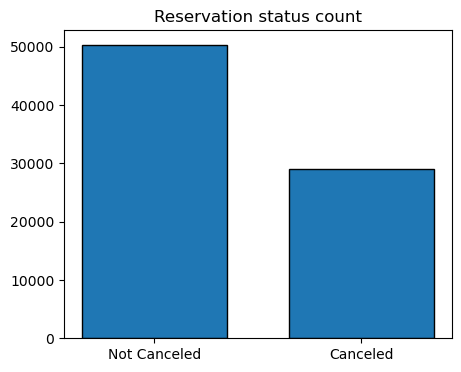

In [120]:
cancelled_perc = df3["is_canceled"].value_counts(normalize = True)
print(cancelled_perc)

plt.figure(figsize = (5,4))

plt.title("Reservation status count")

plt.bar(["Not Canceled","Canceled"],df2["is_canceled"].value_counts(),edgecolor="k",width = 0.7)
plt.show()

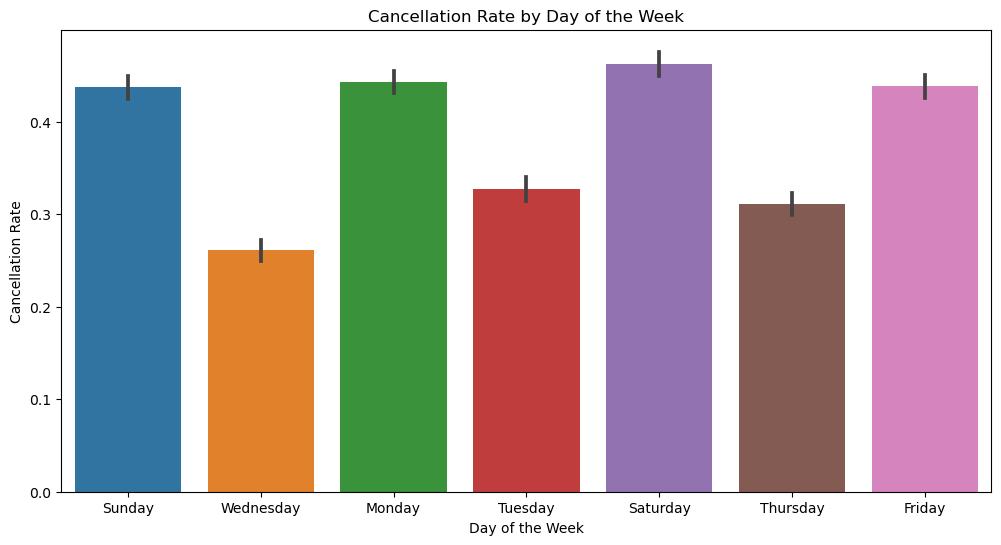

In [121]:
df3['day_of_week'] = df3['reservation_status_date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='is_canceled', data=df3, estimator=lambda x: sum(x) / len(x))
plt.title('Cancellation Rate by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Cancellation Rate')
plt.show()

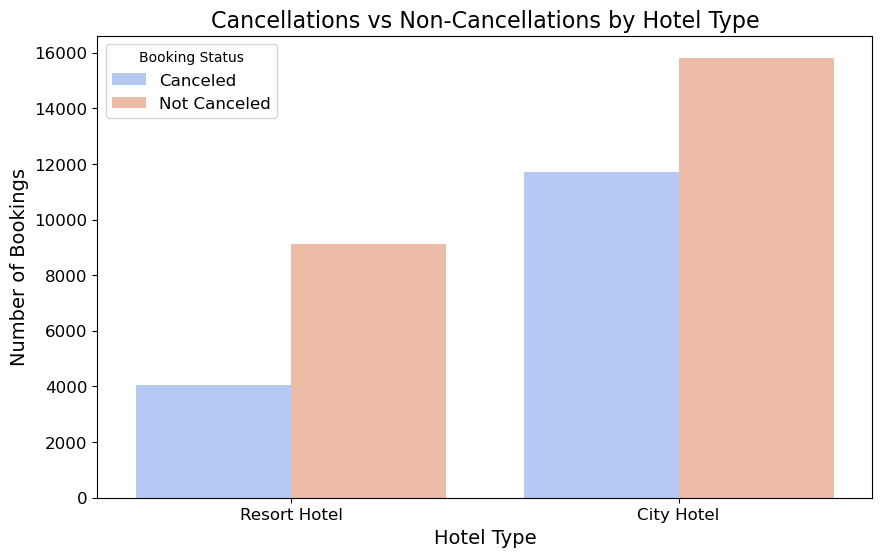

In [122]:
df3['Cancellation_Status'] = df3['is_canceled'].apply(lambda x: 'Canceled' if x == 1 else 'Not Canceled')

plt.figure(figsize=(10, 6))
sns.countplot(data=df3, x='hotel', hue='Cancellation_Status', palette='coolwarm')

plt.title('Cancellations vs Non-Cancellations by Hotel Type', fontsize=16)
plt.xlabel('Hotel Type', fontsize=14)
plt.ylabel('Number of Bookings', fontsize=14)
plt.legend(title='Booking Status', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

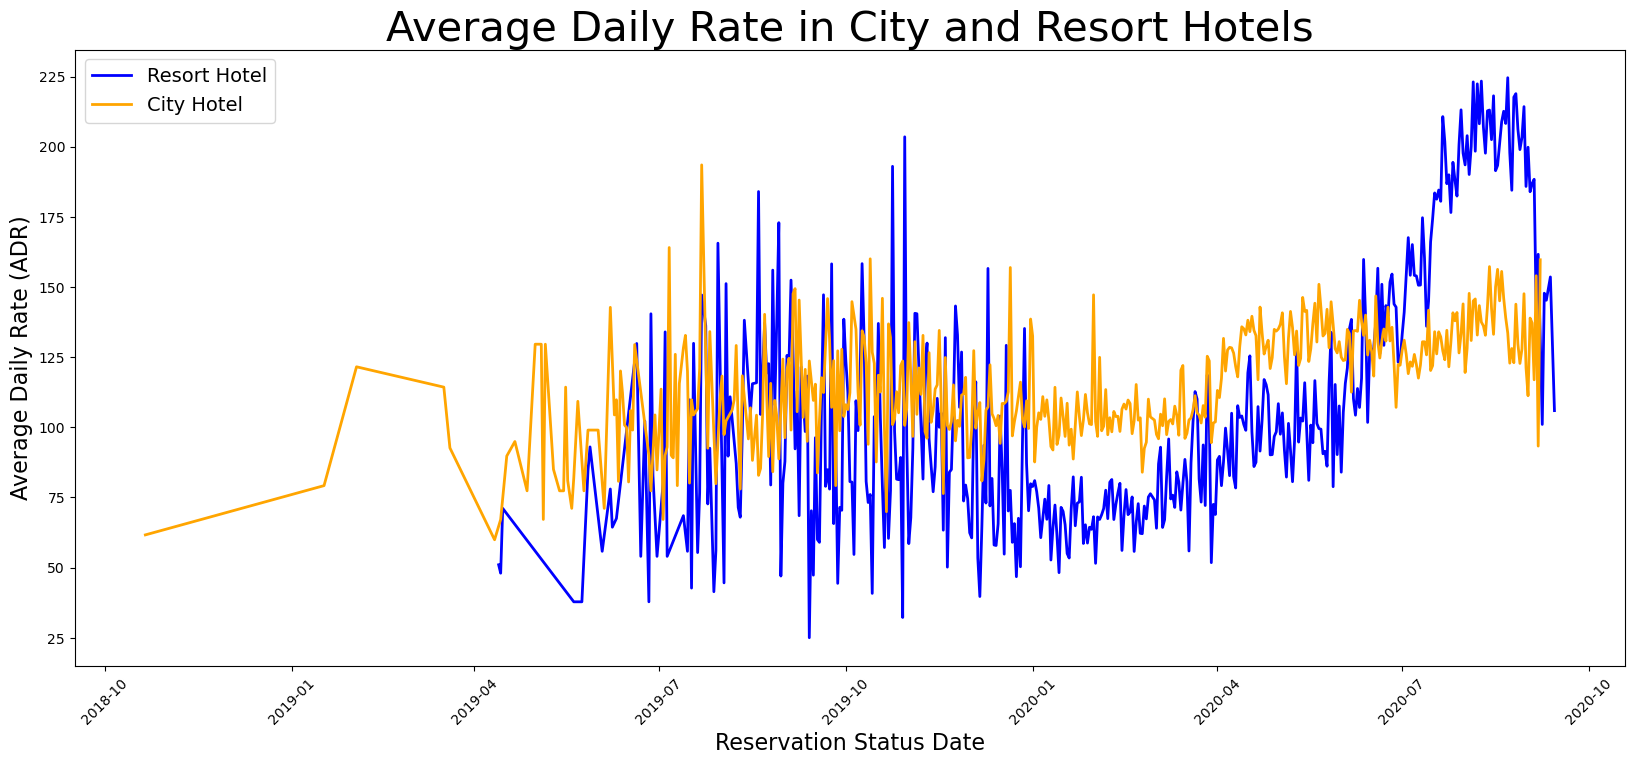

In [123]:
resort_hotel = df3[df3['hotel'] == 'Resort Hotel']
city_hotel = df3[df3['hotel'] == 'City Hotel']

resort_hotel_cancellation = resort_hotel['is_canceled'].value_counts(normalize=True)
city_hotel_cancellation = city_hotel['is_canceled'].value_counts(normalize=True)

resort_hotel_adr = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel_adr = city_hotel.groupby('reservation_status_date')[['adr']].mean()

plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate in City and Resort Hotels", fontsize=30)

plt.plot(resort_hotel_adr.index, resort_hotel_adr['adr'], label='Resort Hotel', color='blue', linewidth=2)

plt.plot(city_hotel_adr.index, city_hotel_adr['adr'], label='City Hotel', color='orange', linewidth=2)

plt.xlabel('Reservation Status Date', fontsize=16)
plt.ylabel('Average Daily Rate (ADR)', fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=14)

plt.show()

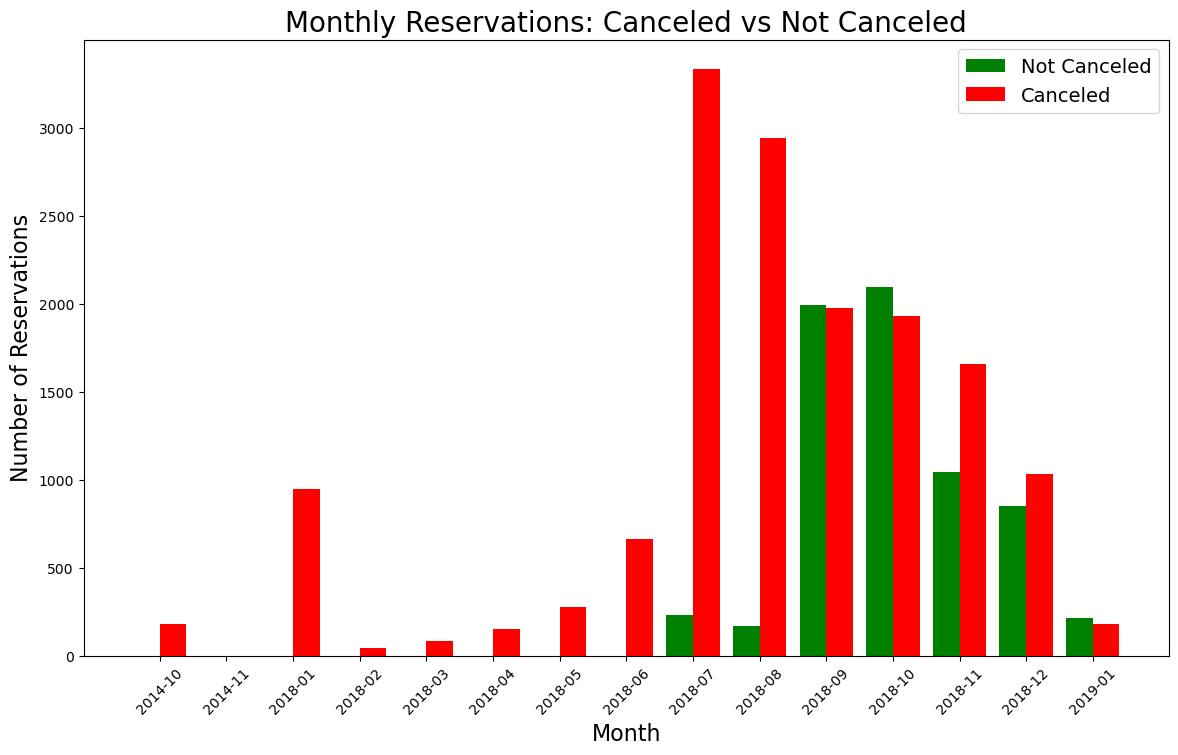

In [124]:
df3['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

df3['reservation_month'] = df3['reservation_status_date'].dt.to_period('M')

monthly_reservations = df3.groupby(['reservation_month', 'is_canceled']).size().unstack(fill_value=0)

monthly_reservations = monthly_reservations.reset_index()

monthly_reservations.columns = ['Month', 'Not Canceled', 'Canceled']
plt.figure(figsize=(14, 8))

bar_width = 0.4
index = np.arange(len(monthly_reservations['Month']))

plt.bar(index, monthly_reservations['Not Canceled'], bar_width, label='Not Canceled', color='green')

plt.bar(index + bar_width, monthly_reservations['Canceled'], bar_width, label='Canceled', color='red')

plt.title('Monthly Reservations: Canceled vs Not Canceled', fontsize=20)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Reservations', fontsize=16)
plt.xticks(index + bar_width / 2, monthly_reservations['Month'].astype(str), rotation=45)
plt.legend(fontsize=14)

plt.show()

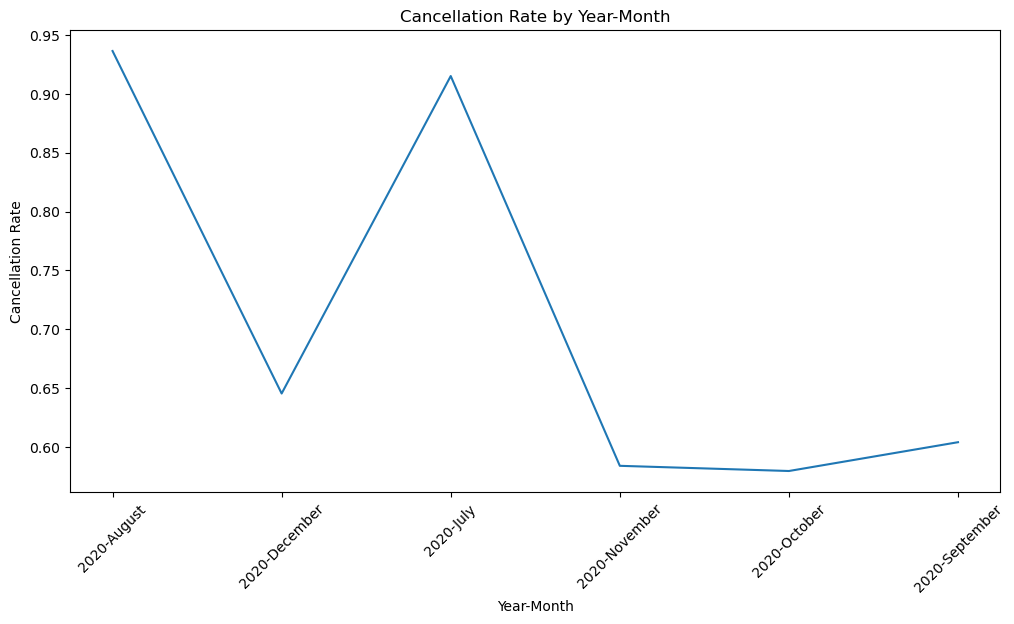

In [125]:
df3['year_month'] = df3['arrival_date_year'].astype(str) + '-' + df['arrival_date_month']
year_month_cancellation_rate = df3.groupby('year_month')['is_canceled'].mean()

plt.figure(figsize=(12, 6))
year_month_cancellation_rate.plot()
plt.title('Cancellation Rate by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Cancellation Rate')
plt.xticks(rotation=45)
plt.show()


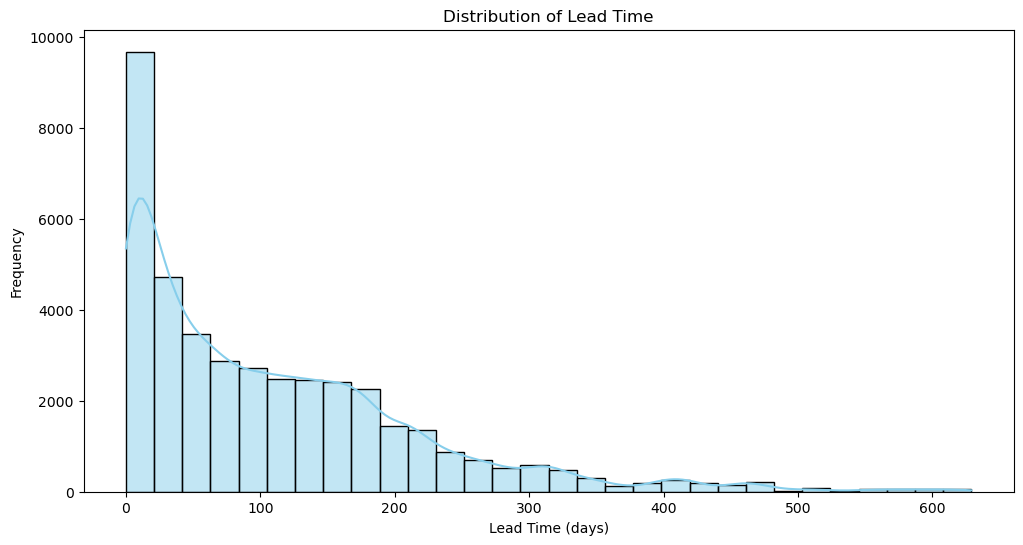

In [126]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df3['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


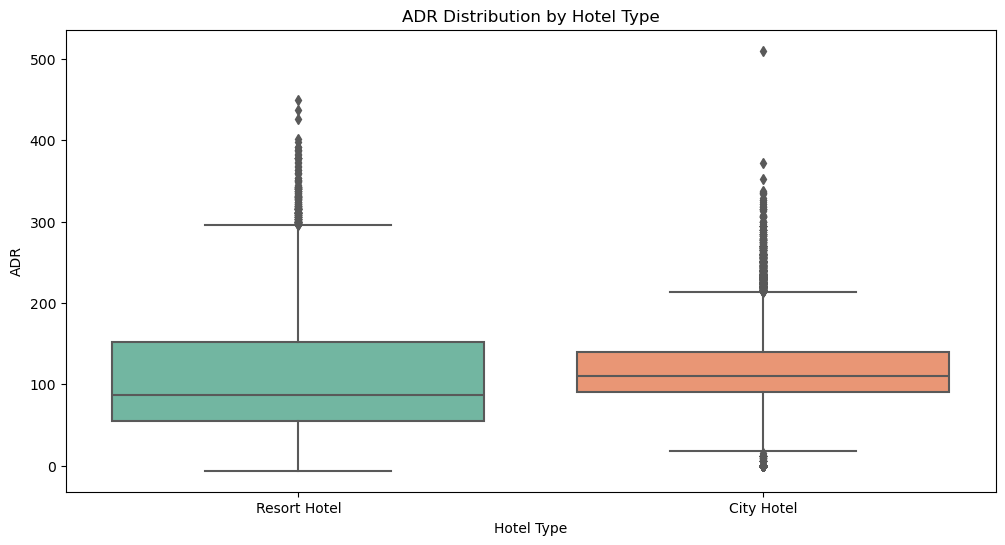

In [127]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df3, x='hotel', y='adr', palette='Set2')
plt.title('ADR Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

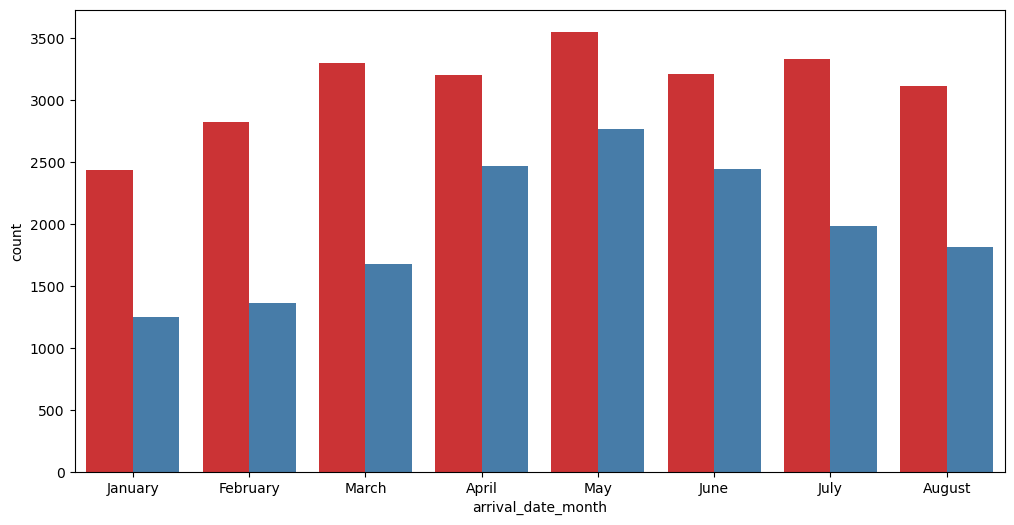

In [128]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df3, x='arrival_date_month', hue='is_canceled', palette='Set1')
plt.title('Monthly Cancellations Count')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.show()


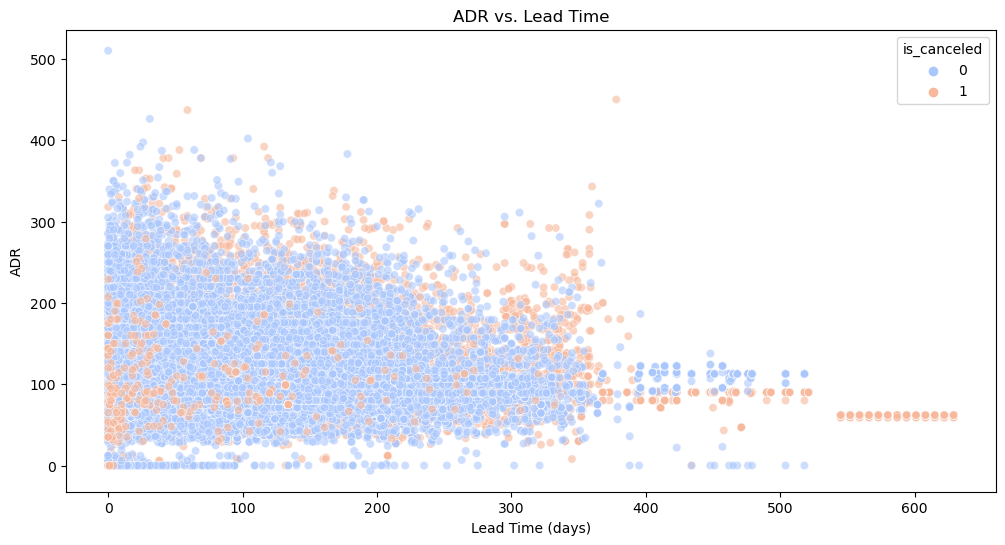

In [129]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df3, x='lead_time', y='adr', hue='is_canceled', palette='coolwarm', alpha=0.6)
plt.title('ADR vs. Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('ADR')
plt.show()


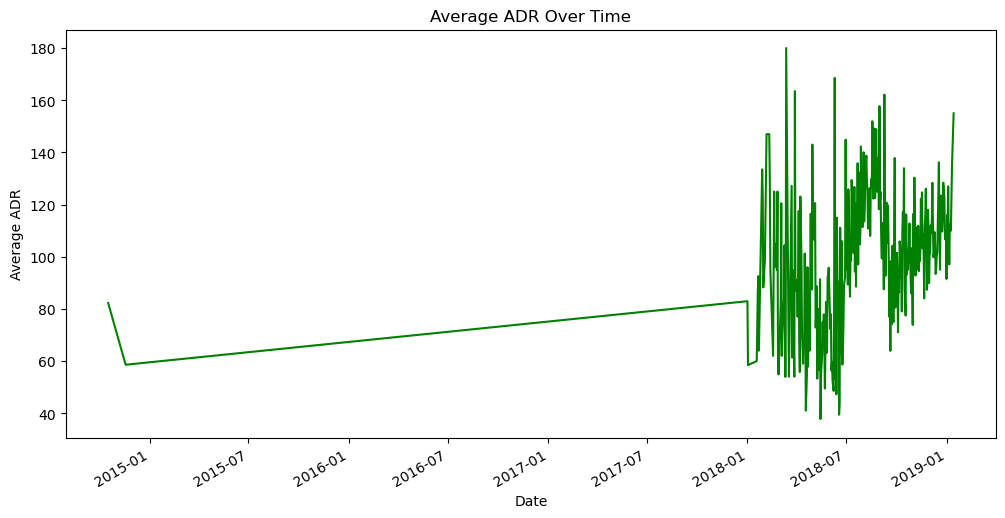

In [130]:
df3['reservation_status_date'] = pd.to_datetime(df3['reservation_status_date'])

adr_over_time = df3.groupby('reservation_status_date')['adr'].mean()

plt.figure(figsize=(12, 6))
adr_over_time.plot(kind='line', color='green')
plt.title('Average ADR Over Time')
plt.xlabel('Date')
plt.ylabel('Average ADR')
plt.show()

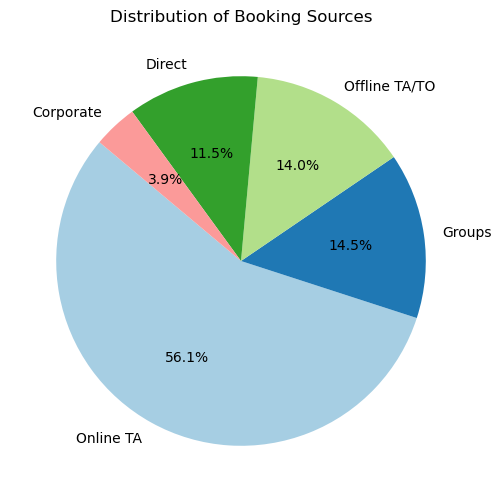

In [131]:
booking_source_distribution = df3['market_segment'].value_counts().sort_values(ascending = False).head(5)

plt.figure(figsize=(10, 6))
plt.pie(booking_source_distribution, labels=booking_source_distribution.index, autopct='%1.1f%%',startangle = 140 ,colors=plt.cm.Paired(range(len(booking_source_distribution))))
plt.title('Distribution of Booking Sources')
plt.show()


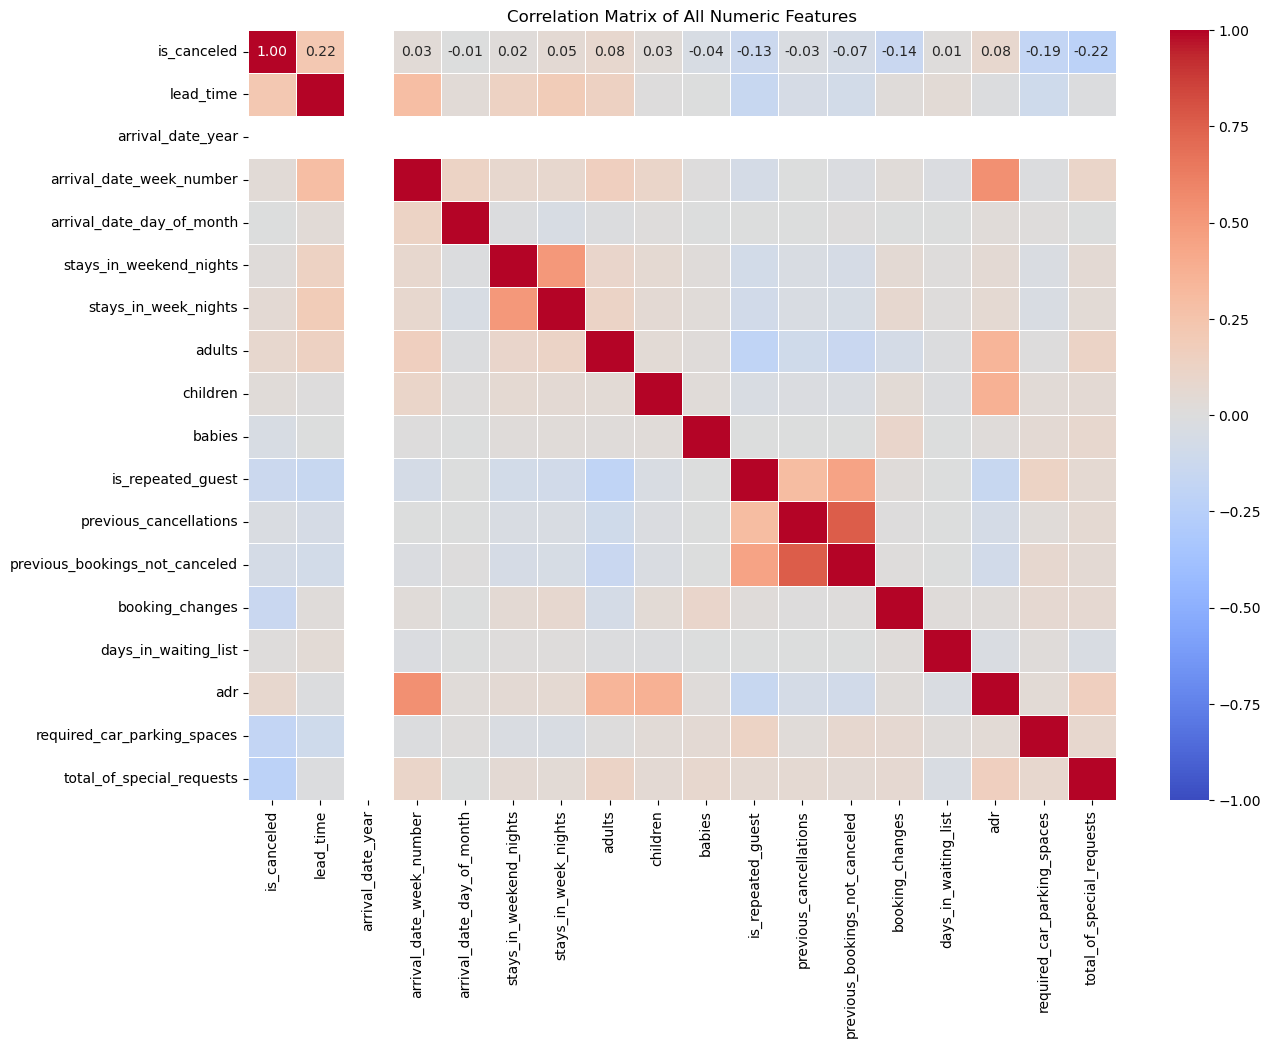

In [132]:
df3_numeric = df3.select_dtypes(include=['number'])

correlation_matrix = df3_numeric.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Matrix of All Numeric Features')
plt.show()

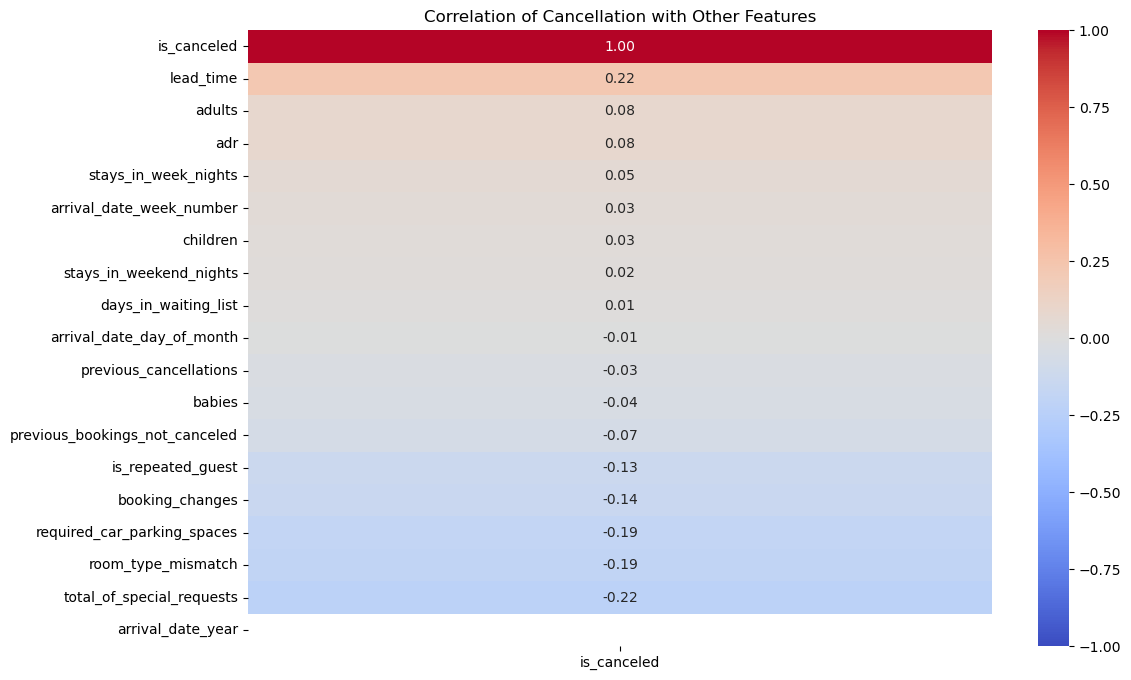

In [133]:
df3['is_canceled'] = pd.to_numeric(df3['is_canceled'], errors='coerce')

correlation_matrix = df3.corr(numeric_only=True)

cancellation_correlation = correlation_matrix[['is_canceled']].sort_values(by='is_canceled', ascending=False)

plt.figure(figsize=(12, 8))
sns.heatmap(cancellation_correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation of Cancellation with Other Features')
plt.show()